<a href="https://colab.research.google.com/github/Tonyy131/International_Hotel_Booking_Customer_Assistant--Team_49/blob/main/Team_49_Hotel_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install & Import Required Libraries


* pandas library for reading, cleaning, and transforming tabular data.
*   NumPy provides mathematical operations and array objects,used by ML frameworks like TensorFlow.

*  TensorFlow It is platform for building and training neural networks.

*  Matplotlib It is a library that gives you the full control over how the figures and charts look

*  Seaborn It adds a modern easy to use interfaces for creating statistical and aesthetic visualizations

*  sklearn It is  simple interface used to perform data preprocessing to model training, evaluation, and prediction
*   keras It is a high level deep learning API and it lets you buid, train,and test neural networks.


*   Shap It interprets model predictions globally and locally using game theory.

*   Lime It explains model predictions locally for individual samples.
*   joblib  It is efficient serialization for Python objects

*   os It is an operating system interface taht allows you to create, delete,navigate,or check directories

*  json It handles serialization and deserialization of data  


In [ ]:
# --- Install Required Packages (only needed once) ---
!pip install lime category_encoders

# --- Standard Libraries ---
import os
import json
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# --- Machine Learning & Preprocessing ---
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    StandardScaler
)

# --- Imbalanced Data Handling ---
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

# --- LightGBM ---
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# --- Deep Learning (TensorFlow / Keras) ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# --- Feature Encoding ---
from category_encoders import TargetEncoder

# --- Explainability ---
import shap
import lime
from lime import lime_tabular


In [ ]:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

### Load Dataset Files

In [ ]:
hotels_df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "antonyayman/hotel-reviews-dataset",
  "hotels.csv"
)

reviews_df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "antonyayman/hotel-reviews-dataset",
  "reviews.csv"
)

users_df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "antonyayman/hotel-reviews-dataset",
  "users.csv"
)

Using Colab cache for faster access to the 'hotel-reviews-dataset' dataset.
Using Colab cache for faster access to the 'hotel-reviews-dataset' dataset.
Using Colab cache for faster access to the 'hotel-reviews-dataset' dataset.


# Check if Data needs cleaning

## Check hotels dataset

In [ ]:
hotels_df.head()

hotel_id         hotel_name      city               country  star_rating  \
0         1    The Azure Tower  New York         United States            5   
1         2  The Royal Compass    London        United Kingdom            5   
2         3    L'Étoile Palace     Paris                France            5   
3         4       Kyo-to Grand     Tokyo                 Japan            5   
4         5   The Golden Oasis     Dubai  United Arab Emirates            5   

       lat       lon  cleanliness_base  comfort_base  facilities_base  \
0  40.7580  -73.9855               9.1           8.8              8.9   
1  51.5072   -0.1276               9.0           9.2              8.8   
2  48.8566    2.3522               8.8           9.4              8.7   
3  35.6895  139.6917               9.6           9.0              9.3   
4  25.2769   55.2962               9.3           9.5              9.6   

   location_base  staff_base  value_for_money_base  
0            9.5         8.6                   8.0  
1            9.4         9.0                   7.9  
2            9.6         9.3                   8.1  
3            8.5         9.5                   8.2  
4            8.9         9.4                   8.5

### Checking if there are null values

In [ ]:
hotels_df.isnull().sum()

hotel_id                0
hotel_name              0
city                    0
country                 0
star_rating             0
lat                     0
lon                     0
cleanliness_base        0
comfort_base            0
facilities_base         0
location_base           0
staff_base              0
value_for_money_base    0
dtype: int64

### Checking for duplicate values

In [ ]:
hotels_df.duplicated().sum()

np.int64(0)

## Check users dataset




### Checking for null values

In [ ]:
users_df.isnull().sum()

user_id           0
user_gender       0
country           0
age_group         0
traveller_type    0
join_date         0
dtype: int64

###Renaming column to avoid propblems

This was done to avoid problems because of the hotel's country column

In [ ]:
users_df = users_df.rename(columns={'country': 'user_country'})

In [ ]:
users_df.head()

user_id user_gender    user_country age_group traveller_type   join_date
0        1      Female  United Kingdom     35-44           Solo  2024-09-29
1        2        Male  United Kingdom     25-34           Solo  2023-11-29
2        3      Female          Mexico     25-34         Family  2022-04-03
3        4        Male           India     35-44         Family  2023-12-02
4        5       Other           Japan     25-34           Solo  2021-12-18

### Checking for duplicate values

In [ ]:
users_df.duplicated().sum()

np.int64(0)

##Check reviews dataset




In [ ]:
reviews_df.head()

review_id  user_id  hotel_id review_date  score_overall  score_cleanliness  \
0          1     1600         1  2022-10-07            8.7                8.6   
1          2      432         4  2020-03-24            9.1               10.0   
2          3      186        18  2023-12-18            8.8                9.7   
3          4     1403        19  2022-06-22            8.9                9.0   
4          5     1723        17  2022-07-02            9.1                8.9   

   score_comfort  score_facilities  score_location  score_staff  \
0            8.7               8.5             9.0          8.8   
1            9.1               9.0             8.6          9.4   
2            8.8               8.3             8.7          8.1   
3            8.8               8.5             9.6          9.1   
4            9.5               9.3             8.3          9.4   

   score_value_for_money                                        review_text  
0                    8.7  Practice reduce young our because machine. Rec...  
1                    8.6  Test cover traditional black. Process tell Mr ...  
2                    8.6  Friend million student social study yeah. Grow...  
3                    8.3  Huge girl already remain truth behind card. Ap...  
4                    8.9  Cover feeling call community serve television ...

### Checking null values

In [ ]:
reviews_sum_null = reviews_df.isnull().sum()
print(reviews_sum_null)

review_id                0
user_id                  0
hotel_id                 0
review_date              0
score_overall            0
score_cleanliness        0
score_comfort            0
score_facilities         0
score_location           0
score_staff              0
score_value_for_money    0
review_text              0
dtype: int64


### Checking Duplicate values

In [ ]:
reviews_df.duplicated().sum()

np.int64(0)

#Create Country Groups new column

In [ ]:
# Create a new column 'country_group' based on the 'country_y' column
def categorize_country(country):
    if country in ['United States', 'Canada']:
        return 'North America'
    elif country in ['Germany', 'France', 'United Kingdom', 'Netherlands', 'Spain', 'Italy']:
        return 'Western_Europe'
    elif country in ['Russia']:
        return 'Eastern_Europe'
    elif country in ['China', 'Japan', 'South Korea']:
        return 'East_Asia'
    elif country in ['Thailand', 'Singapore']:
        return 'Southeast_Asia'
    elif country in ['United Arab Emirates', 'Turkey']:
        return 'Middle_East'
    elif country in ['Egypt', 'Nigeria', 'South Africa']:
        return 'Africa'
    elif country in ['Australia', 'New Zealand']:
        return 'Oceania'
    elif country in ['Brazil', 'Argentina']:
        return 'South_America'
    elif country in ['India']:
        return 'South_Asia'
    elif country in ['Mexico']:
        return 'North_America_Mexico'
    else:
        return 'Other'

hotels_df['country_group'] = hotels_df['country'].apply(categorize_country)
hotels_df.head()

hotel_id         hotel_name      city               country  star_rating  \
0         1    The Azure Tower  New York         United States            5   
1         2  The Royal Compass    London        United Kingdom            5   
2         3    L'Étoile Palace     Paris                France            5   
3         4       Kyo-to Grand     Tokyo                 Japan            5   
4         5   The Golden Oasis     Dubai  United Arab Emirates            5   

       lat       lon  cleanliness_base  comfort_base  facilities_base  \
0  40.7580  -73.9855               9.1           8.8              8.9   
1  51.5072   -0.1276               9.0           9.2              8.8   
2  48.8566    2.3522               8.8           9.4              8.7   
3  35.6895  139.6917               9.6           9.0              9.3   
4  25.2769   55.2962               9.3           9.5              9.6   

   location_base  staff_base  value_for_money_base   country_group  
0            9.5         8.6                   8.0   North America  
1            9.4         9.0                   7.9  Western_Europe  
2            9.6         9.3                   8.1  Western_Europe  
3            8.5         9.5                   8.2       East_Asia  
4            8.9         9.4                   8.5     Middle_East

# Merge All Datasets




In [ ]:
merged_df = pd.merge(reviews_df, hotels_df, on="hotel_id", how="left")

merged_df = pd.merge(merged_df, users_df, on="user_id", how="left")

In [ ]:
merged_df.head()

review_id  user_id  hotel_id review_date  score_overall  score_cleanliness  \
0          1     1600         1  2022-10-07            8.7                8.6   
1          2      432         4  2020-03-24            9.1               10.0   
2          3      186        18  2023-12-18            8.8                9.7   
3          4     1403        19  2022-06-22            8.9                9.0   
4          5     1723        17  2022-07-02            9.1                8.9   

   score_comfort  score_facilities  score_location  score_staff  ...  \
0            8.7               8.5             9.0          8.8  ...   
1            9.1               9.0             8.6          9.4  ...   
2            8.8               8.3             8.7          8.1  ...   
3            8.8               8.5             9.6          9.1  ...   
4            9.5               9.3             8.3          9.4  ...   

   facilities_base location_base staff_base value_for_money_base  \
0              8.9           9.5        8.6                  8.0   
1              9.3           8.5        9.5                  8.2   
2              8.6           9.1        8.7                  8.4   
3              8.9           9.7        9.0                  8.8   
4              9.0           9.0        9.1                  8.6   

    country_group  user_gender    user_country  age_group  traveller_type  \
0   North America       Female     New Zealand      25-34            Solo   
1       East_Asia       Female  United Kingdom      35-44          Couple   
2          Africa       Female           Spain        55+          Couple   
3  Western_Europe       Female  United Kingdom      35-44        Business   
4  Eastern_Europe         Male       Australia      45-54          Family   

    join_date  
0  2021-03-21  
1  2025-04-01  
2  2021-10-28  
3  2023-10-10  
4  2023-02-28  

[5 rows x 30 columns]

# Answering Data-Engineering Questions

## Which city is best for each traveler type

In [ ]:
city_scores_per_traveler_type = (
    merged_df.groupby(['traveller_type', 'city'])['score_overall']
    .mean()
    .reset_index()
    .sort_values(["traveller_type", "score_overall"], ascending=[True, False])
)

best_cities_per_traveler_type = (
    city_scores_per_traveler_type.groupby('traveller_type')
    .head(3)
)
print("Best Cities for Each Traveler Type:")
print(best_cities_per_traveler_type)

Best Cities for Each Traveler Type:
   traveller_type       city  score_overall
7        Business      Dubai       8.965668
0        Business  Amsterdam       8.964348
20       Business  Singapore       8.944472
25         Couple  Amsterdam       9.096989
32         Couple      Dubai       9.087252
45         Couple  Singapore       9.047571
57         Family      Dubai       9.214381
50         Family  Amsterdam       9.196171
69         Family   Shanghai       9.161123
75           Solo  Amsterdam       9.108454
82           Solo      Dubai       9.100451
94           Solo   Shanghai       9.070852


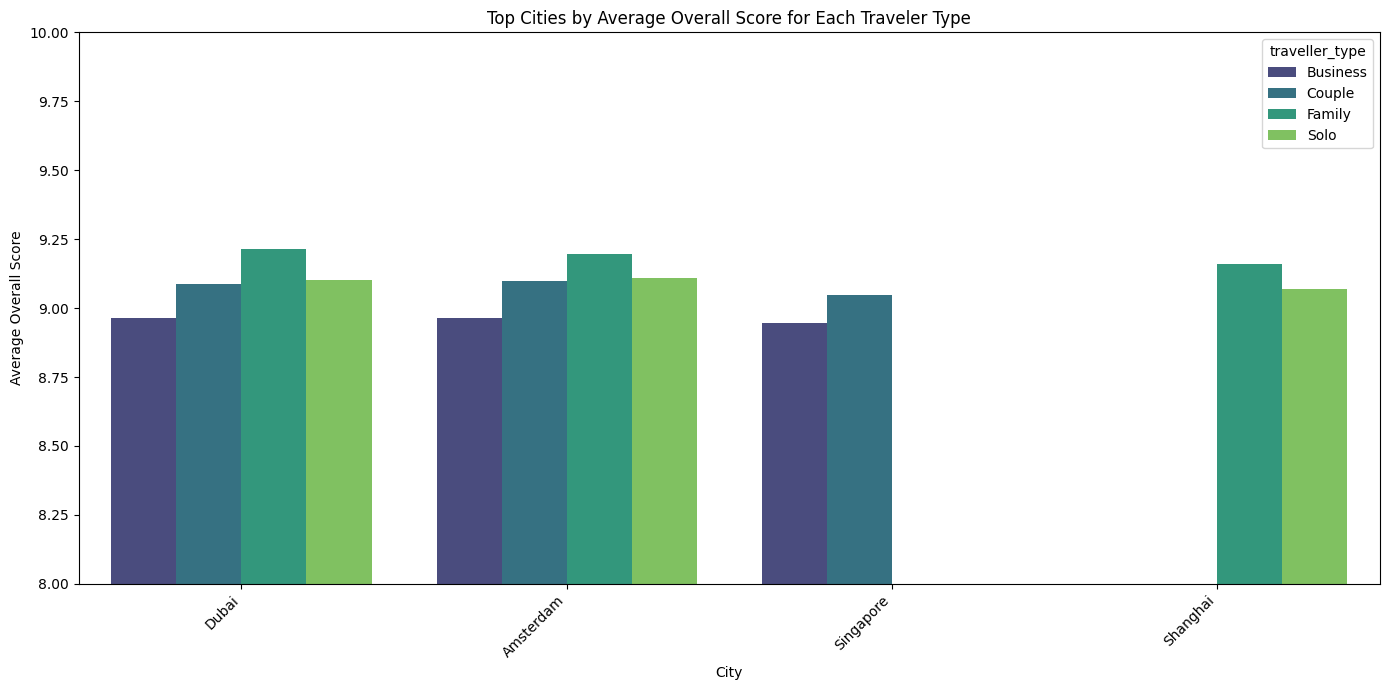

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=best_cities_per_traveler_type, x='city', y='score_overall', hue='traveller_type', palette='viridis')
plt.title('Top Cities by Average Overall Score for Each Traveler Type')
plt.xlabel('City')
plt.ylabel('Average Overall Score')
plt.ylim(8, 10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
city_scores_per_traveler_type = (
    merged_df.groupby(['traveller_type', 'city'])['score_cleanliness']
    .mean()
    .reset_index()
    .sort_values(["traveller_type", "score_cleanliness"], ascending=[True, False])
)

best_cities_per_traveler_type = (
    city_scores_per_traveler_type.groupby('traveller_type')
    .head(3)
)
print("Best Cities for Each Traveler Type For Cleanliness:")
print(best_cities_per_traveler_type)

Best Cities for Each Traveler Type For Cleanliness:
   traveller_type       city  score_cleanliness
22       Business      Tokyo           8.813514
23       Business    Toronto           8.683721
0        Business  Amsterdam           8.657826
47         Couple      Tokyo           9.704970
48         Couple    Toronto           9.590385
25         Couple  Amsterdam           9.576545
72         Family      Tokyo           9.688223
50         Family  Amsterdam           9.573874
73         Family    Toronto           9.554348
97           Solo      Tokyo           9.125240
98           Solo    Toronto           8.972362
75           Solo  Amsterdam           8.968116


In [ ]:
city_scores_per_traveler_type = (
    merged_df.groupby(['traveller_type', 'city'])['score_comfort']
    .mean()
    .reset_index()
    .sort_values(["traveller_type", "score_comfort"], ascending=[True, False])
)

best_cities_per_traveler_type = (
    city_scores_per_traveler_type.groupby('traveller_type')
    .head(3)
)
print("Best Cities for Each Traveler Type For Comfort:")
print(best_cities_per_traveler_type)

Best Cities for Each Traveler Type For Comfort:
   traveller_type   city  score_comfort
7        Business  Dubai       9.058756
15       Business  Paris       8.985167
18       Business  Seoul       8.966033
32         Couple  Dubai       9.636402
43         Couple  Seoul       9.580658
40         Couple  Paris       9.564566
57         Family  Dubai       9.375221
68         Family  Seoul       9.286879
65         Family  Paris       9.269510
82           Solo  Dubai       9.071106
90           Solo  Paris       8.978061
93           Solo  Seoul       8.972010


In [ ]:
city_scores_per_traveler_type = (
    merged_df.groupby(['traveller_type', 'city'])['score_facilities']
    .mean()
    .reset_index()
    .sort_values(["traveller_type", "score_facilities"], ascending=[True, False])
)

best_cities_per_traveler_type = (
    city_scores_per_traveler_type.groupby('traveller_type')
    .head(3)
)
print("Best Cities for Each Traveler Type For Facilities:")
print(best_cities_per_traveler_type)

Best Cities for Each Traveler Type For Facilities:
   traveller_type       city  score_facilities
7        Business      Dubai          9.402995
20       Business  Singapore          9.270025
22       Business      Tokyo          9.207125
32         Couple      Dubai          8.820963
45         Couple  Singapore          8.667714
47         Couple      Tokyo          8.610693
57         Family      Dubai          9.699115
70         Family  Singapore          9.567742
72         Family      Tokyo          9.508471
82           Solo      Dubai          9.119639
95           Solo  Singapore          8.983296
97           Solo      Tokyo          8.927885


In [ ]:
city_scores_per_traveler_type = (
    merged_df.groupby(['traveller_type', 'city'])['score_location']
    .mean()
    .reset_index()
    .sort_values(["traveller_type", "score_location"], ascending=[True, False])
)

best_cities_per_traveler_type = (
    city_scores_per_traveler_type.groupby('traveller_type')
    .head(3)
)
print("Best Cities for Each Traveler Type For Locations:")
print(best_cities_per_traveler_type)

Best Cities for Each Traveler Type For Locations:
   traveller_type       city  score_location
21       Business     Sydney        9.803675
17       Business       Rome        9.789356
2        Business  Barcelona        9.753409
46         Couple     Sydney        9.567463
42         Couple       Rome        9.563677
27         Couple  Barcelona        9.502267
67         Family       Rome        9.277308
71         Family     Sydney        9.261620
52         Family  Barcelona        9.169737
92           Solo       Rome        9.557407
96           Solo     Sydney        9.555760
77           Solo  Barcelona        9.484478


In [ ]:
city_scores_per_traveler_type = (
    merged_df.groupby(['traveller_type', 'city'])['score_staff']
    .mean()
    .reset_index()
    .sort_values(["traveller_type", "score_staff"], ascending=[True, False])
)

best_cities_per_traveler_type = (
    city_scores_per_traveler_type.groupby('traveller_type')
    .head(3)
)
print("Best Cities for Each Traveler Type For Staff:")
print(best_cities_per_traveler_type)

Best Cities for Each Traveler Type For Staff:
   traveller_type   city  score_staff
22       Business  Tokyo     9.344472
7        Business  Dubai     9.249309
18       Business  Seoul     9.208314
47         Couple  Tokyo     9.075151
32         Couple  Dubai     8.989660
43         Couple  Seoul     8.924691
72         Family  Tokyo     9.354545
57         Family  Dubai     9.267035
68         Family  Seoul     9.209940
97           Solo  Tokyo     9.633413
82           Solo  Dubai     9.598871
93           Solo  Seoul     9.502392


In [ ]:
city_scores_per_traveler_type = (
    merged_df.groupby(['traveller_type', 'city'])['score_value_for_money']
    .mean()
    .reset_index()
    .sort_values(["traveller_type", "score_value_for_money"], ascending=[True, False])
)

best_cities_per_traveler_type = (
    city_scores_per_traveler_type.groupby('traveller_type')
    .head(3)
)
print("Best Cities for Each Traveler Type For Money:")
print(best_cities_per_traveler_type)

Best Cities for Each Traveler Type For Money:
   traveller_type        city  score_value_for_money
0        Business   Amsterdam               8.055217
19       Business    Shanghai               8.022059
23       Business     Toronto               7.966744
25         Couple   Amsterdam               8.620919
44         Couple    Shanghai               8.601560
49         Couple  Wellington               8.560552
50         Family   Amsterdam               8.937613
69         Family    Shanghai               8.936383
73         Family     Toronto               8.883696
94           Solo    Shanghai               9.238789
75           Solo   Amsterdam               9.212077
99           Solo  Wellington               9.164798


## What are the top 3 countries with the best value-for-money score per traveler’s age group

In [ ]:
city_scores_per_age_group = (
    merged_df.groupby(['age_group', 'country'])['score_value_for_money']
    .mean()
    .reset_index()
    .sort_values(["age_group", "score_value_for_money"], ascending=[True, False])
)

best_countries_per_age_group = (
    city_scores_per_age_group.groupby('age_group')
    .head(3)
)
print("Best Countries for Each Age Group For Money:")
print(best_countries_per_age_group)

Best Countries for Each Age Group For Money:
    age_group      country  score_value_for_money
4       18-24        China               8.706926
12      18-24  Netherlands               8.704911
3       18-24       Canada               8.661261
29      25-34        China               8.727941
37      25-34  Netherlands               8.683442
44      25-34        Spain               8.625074
54      35-44        China               8.700799
62      35-44  Netherlands               8.693268
63      35-44  New Zealand               8.646429
79      45-54        China               8.722112
88      45-54  New Zealand               8.674194
87      45-54  Netherlands               8.647458
112       55+  Netherlands               8.698537
113       55+  New Zealand               8.629384
104       55+        China               8.601000


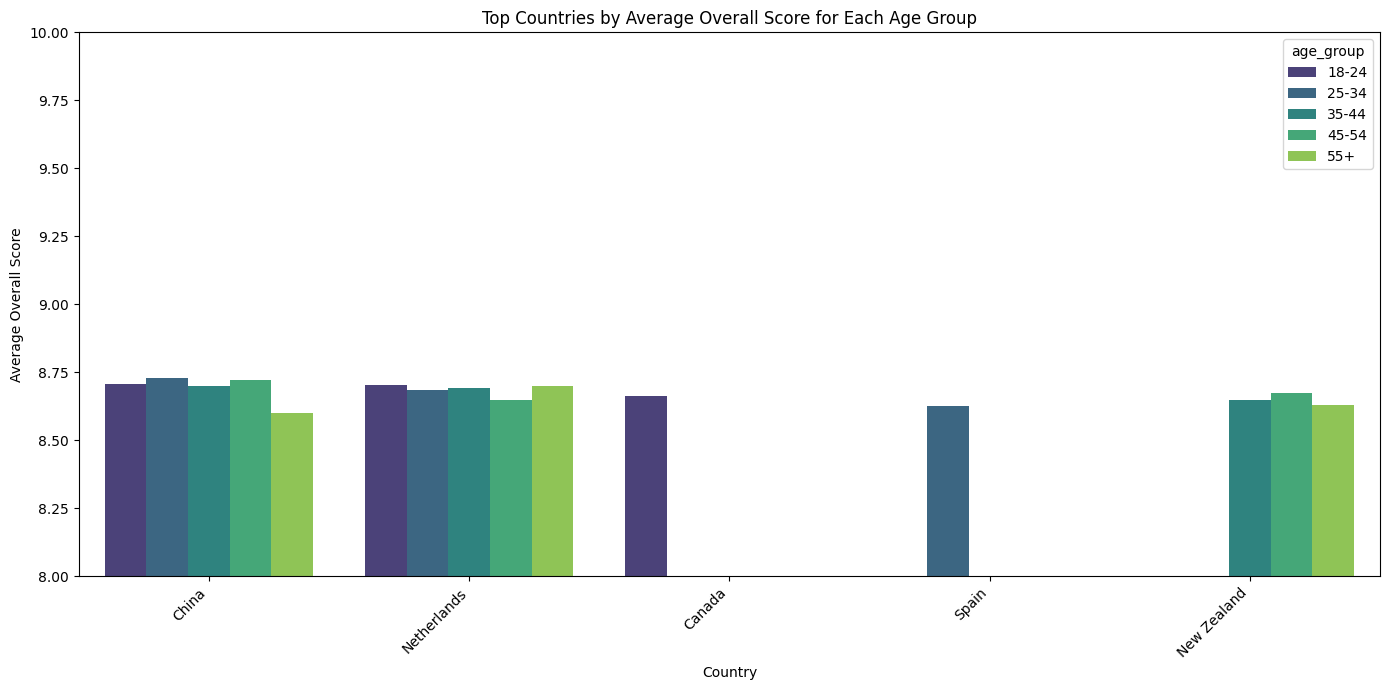

In [ ]:

plt.figure(figsize=(14, 7))
sns.barplot(data=best_countries_per_age_group, x='country', y='score_value_for_money', hue='age_group', palette='viridis')
plt.title('Top Countries by Average Overall Score for Each Age Group')
plt.xlabel('Country')
plt.ylabel('Average Overall Score')
plt.ylim(8, 10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Checking for non-useful columns

In [ ]:
for column in merged_df.columns:
    print(f"Unique values in '{column}':", merged_df[column].nunique())

Unique values in 'review_id': 50000
Unique values in 'user_id': 2000
Unique values in 'hotel_id': 25
Unique values in 'review_date': 2192
Unique values in 'score_overall': 15
Unique values in 'score_cleanliness': 24
Unique values in 'score_comfort': 22
Unique values in 'score_facilities': 25
Unique values in 'score_location': 22
Unique values in 'score_staff': 22
Unique values in 'score_value_for_money': 30
Unique values in 'review_text': 50000
Unique values in 'hotel_name': 25
Unique values in 'city': 25
Unique values in 'country': 25
Unique values in 'star_rating': 1
Unique values in 'lat': 25
Unique values in 'lon': 25
Unique values in 'cleanliness_base': 9
Unique values in 'comfort_base': 10
Unique values in 'facilities_base': 11
Unique values in 'location_base': 12
Unique values in 'staff_base': 10
Unique values in 'value_for_money_base': 11
Unique values in 'country_group': 11
Unique values in 'user_gender': 3
Unique values in 'user_country': 25
Unique values in 'age_group': 5
Un

Since star_rating has only 1 value, so it will be of no use for the model.

#Checking country_group balance

In [ ]:
country_group_percentages = hotels_df['country_group'].value_counts(normalize=True) * 100
print("Percentage of Hotels per Country Group:")
print(country_group_percentages)

Percentage of Hotels per Country Group:
country_group
Western_Europe          24.0
East_Asia               12.0
Africa                  12.0
North America            8.0
Middle_East              8.0
Oceania                  8.0
Southeast_Asia           8.0
South_America            8.0
North_America_Mexico     4.0
South_Asia               4.0
Eastern_Europe           4.0
Name: proportion, dtype: float64


We deduce from that, that there is an imbalance in country_group column as the ratio between "Western_Europe" and "Eastern_Europe" is 6:1. That will cause the model to be bias towards the majority class

# Mapping gender values

We map gender values to numerical values so the model can use it

In [ ]:
gender_map = {'Male': 0, 'Female': 1, 'Other': 2}
merged_df['user_gender'] = merged_df['user_gender'].map(gender_map)

# Testing Features

## Dividing testing features into categorical and numerical

We divide the features into categorical for encoding and numerical for scalling.

In [ ]:
num_features = [
    'score_overall', 'score_cleanliness', 'score_comfort',
    'score_facilities', 'score_location', 'score_staff',
    'score_value_for_money' ,
    'cleanliness_base' , 'comfort_base' , 'facilities_base' , 'staff_base' , 'value_for_money_base',
    'location_base'
]

cat_features = [
    'traveller_type', 'age_group', 'user_country']

## Testing OHE and Standard Scalling

In [ ]:
df_copy = merged_df.copy()
ohe_model = OneHotEncoder(drop='first', sparse_output=False)
X_ohe = ohe_model.fit_transform(df_copy[cat_features])
encoded_df = pd.DataFrame(
    X_ohe,
    columns=ohe_model.get_feature_names_out(cat_features),
    index=df_copy.index
)
scaler_model = StandardScaler()
X_scaled = scaler_model.fit_transform(df_copy[num_features])
scaled_df = pd.DataFrame(
    X_scaled,
    columns=num_features,
    index=df_copy.index
)

processed_df = pd.concat( [encoded_df, scaled_df, merged_df['user_gender']], axis=1)

In [ ]:
X = processed_df

Using label ecoding with the to be predicted column

In [ ]:
le = LabelEncoder()
merged_df['country_group_encoded'] = le.fit_transform(merged_df['country_group'])
y = merged_df['country_group_encoded']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Testing Logistic Regression

In [ ]:
model_1 = LogisticRegression(max_iter=1000)
model_1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model_1.predict(X_test)

print("Model 1 (Demographics & Ticket Info)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model 1 (Demographics & Ticket Info)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       1.00      1.00      1.00      1216
           2       1.00      1.00      1.00       394
           3       1.00      1.00      1.00       797
           4       1.00      1.00      1.00       792
           5       1.00      1.00      1.00       401
           6       1.00      1.00      1.00       803
           7       1.00      1.00      1.00       784
           8       1.00      1.00      1.00       398
           9       1.00      1.00      1.00       814
          10       1.00      1.00      1.00      2375

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



We see that the model has 100% accuracy which means leakage for sure

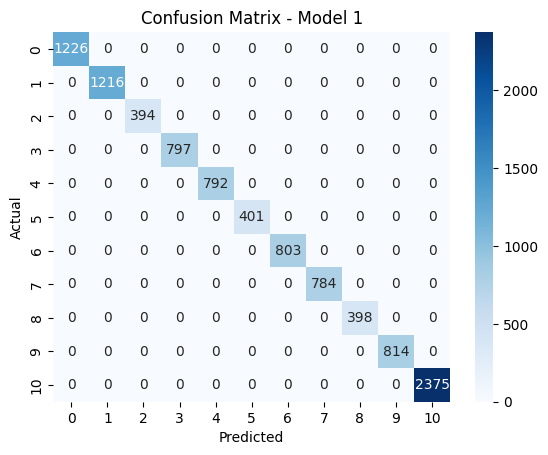

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Model 1")
plt.show()

## Using FFNN

We start to try with the FFNN to be 100% sure that there is a leakage and if so use the FFNN to detect what is causing it.

In [ ]:
y = le.fit_transform(merged_df['country_group'].astype(str))
y_cat = to_categorical(y)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
n_classes = y_train_2.shape[1]

model_2 = Sequential([
Input(shape = (X_train_2.shape[1],)),
layers.Dense(64,activation = 'relu'),
layers.Dropout(0.2),
layers.Dense(32,activation = 'relu'),
layers.Dense(16,activation = 'relu'),
layers.Dense(n_classes,activation = 'softmax')])

In [ ]:
model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy',
	Precision(name = 'precision'),
	Recall(name = 'recall')]
)

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 3, restore_best_weights=True)

In [ ]:
history = model_2.fit(
    X_train_2, y_train_2,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5680 - loss: 1.2351 - precision: 0.8386 - recall: 0.3965 - val_accuracy: 1.0000 - val_loss: 0.0205 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9922 - loss: 0.0418 - precision: 0.9932 - recall: 0.9917 - val_accuracy: 1.0000 - val_loss: 0.0020 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9986 - loss: 0.0106 - precision: 0.9987 - recall: 0.9984 - val_accuracy: 1.0000 - val_loss: 3.6526e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9992 - loss: 0.0053 - precision: 0.9992 - recall: 0.9992 - val_accuracy: 1.0000 - val_loss: 1.8485e-04 - val_precision: 1.0000 - val_recall: 1.0000


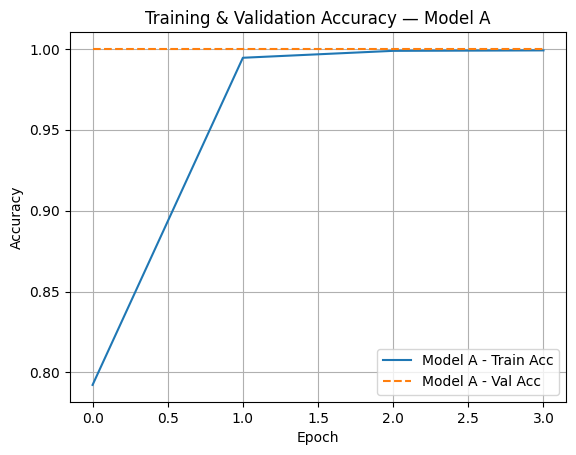

In [ ]:
plt.plot(history.history['accuracy'], label='Model A - Train Acc')
plt.plot(history.history['val_accuracy'], '--', label='Model A - Val Acc')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy — Model A')
plt.legend()
plt.grid(True)
plt.show()

As we can see from the figure the model also has nearly 100% accuracy which esures that there is a leakage

## Figuring out what is causing the leakage

We try using permutation importance to know what has the largest effect on the model causing leakage

In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(model_1, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_imp = pd.Series(res.importances_mean, index=X_test.columns).sort_values(ascending=False)
print("Top permutation importances:\n", perm_imp.head(20))


Top permutation importances:
 facilities_base           0.63886
comfort_base              0.63140
cleanliness_base          0.55848
staff_base                0.53617
location_base             0.51766
value_for_money_base      0.46039
age_group_55+             0.00000
age_group_45-54           0.00000
traveller_type_Couple     0.00000
traveller_type_Family     0.00000
traveller_type_Solo       0.00000
age_group_25-34           0.00000
age_group_35-44           0.00000
user_country_France       0.00000
user_country_Egypt        0.00000
user_country_China        0.00000
user_country_Canada       0.00000
user_country_Brazil       0.00000
user_country_Australia    0.00000
user_country_Germany      0.00000
dtype: float64


We find that the base features are the only ones which have effect on the model

We use SHAP global plot to be sure that the base features are the one resposible

PermutationExplainer explainer: 10001it [10:09, 16.10it/s]                           
/tmp/ipython-input-2161948006.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values, X_test_2, feature_names=X.columns, plot_type='bar')


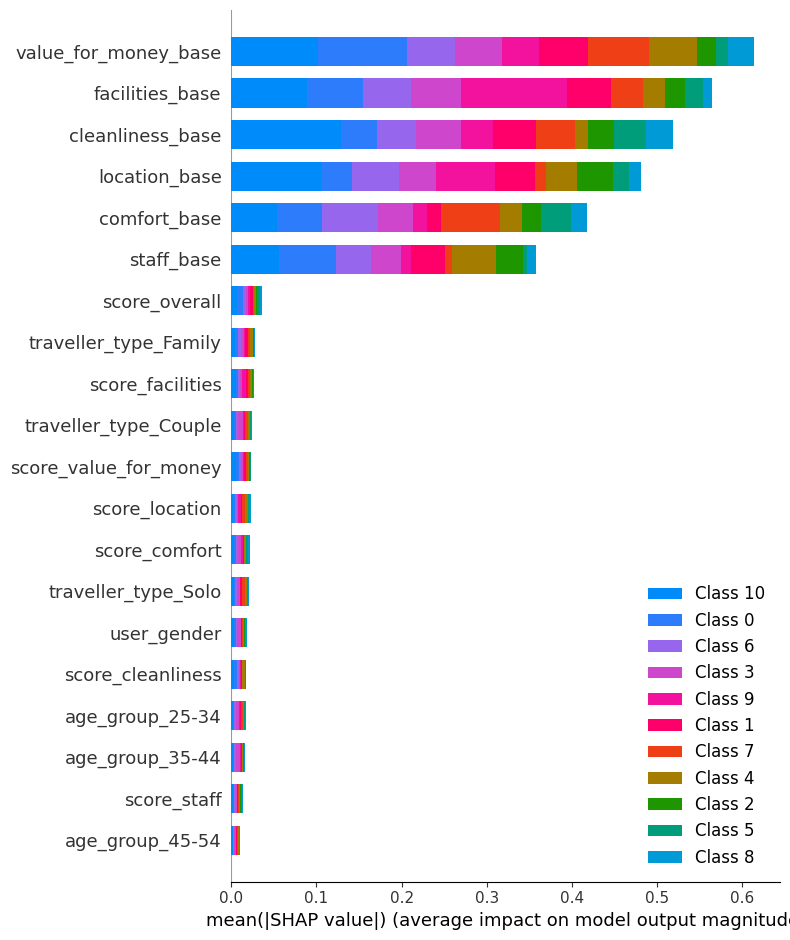

In [ ]:
background = shap.sample(X_train_2, 100, random_state=42)
explainer = shap.Explainer(model_2, background)
shap_values = explainer(X_test_2)

shap.summary_plot(shap_values.values, X_test_2, feature_names=X.columns, plot_type='bar')

Now we are sure that the base features are the ones that cause the leakage, which makes sense because they are found in the same dataset as the country_group (the target feature), so they have 1:1 relation when all base features are used.

# Testing new features

We removed the base features to prevent the leakage.

In [ ]:
num_new_features = [
    'score_overall', 'score_cleanliness', 'score_comfort',
    'score_facilities', 'score_location', 'score_staff',
    'score_value_for_money'
]

cat_new_features = [
    'traveller_type', 'age_group', 'user_country']

## Testing with OHE without Standard Scalling

In [ ]:
df_copy_new = merged_df.copy()

X_ohe_new = ohe_model.fit_transform(df_copy_new[cat_new_features])
encoded_df_new = pd.DataFrame(
    X_ohe_new,
    columns=ohe_model.get_feature_names_out(cat_new_features),
    index=df_copy.index
)

num_df_new = df_copy_new[num_new_features].copy()

processed_df_new = pd.concat([encoded_df_new, num_df_new, merged_df['user_gender']], axis=1)

In [ ]:
X_new = processed_df_new

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

### Testing Random Forest

In [ ]:
model_rf_ohe_noS = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
model_rf_ohe_noS.fit(X_train_new, y_train_new)

train_score = model_rf_ohe_noS.score(X_train_new, y_train_new)
test_score = model_rf_ohe_noS.score(X_test_new, y_test_new)

print("Random Forest Training Accuracy:", train_score)
print("Random Forest Test Accuracy:", test_score)

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.3901


**Since Training Accuracy is very high (100%) while Test Accuarcy is Low(39%) then there is overfitting that has to be fixed**

## Fixing overfitting

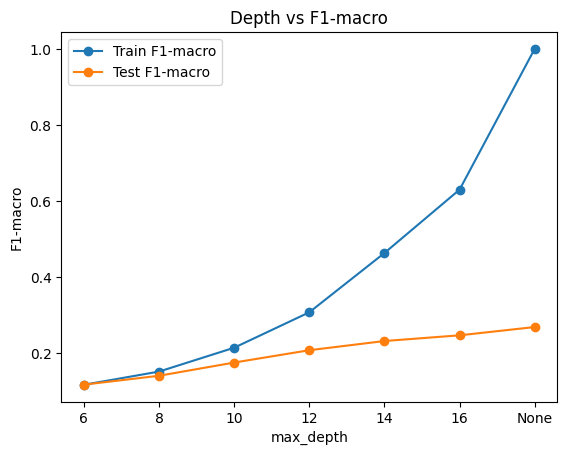

In [ ]:
depths = [6, 8, 10, 12, 14, 16, None]
train_f1, test_f1 = [], []

for d in depths:
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=d,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_new, y_train_new)
    ypred_tr = rf.predict(X_train_new)
    ypred_te = rf.predict(X_test_new)
    train_f1.append(f1_score(y_train_new, ypred_tr, average="macro"))
    test_f1.append(f1_score(y_test_new,  ypred_te, average="macro"))

plt.plot([str(d) for d in depths], train_f1, marker='o', label='Train F1-macro')
plt.plot([str(d) for d in depths], test_f1, marker='o', label='Test F1-macro')
plt.xlabel('max_depth')
plt.ylabel('F1-macro')
plt.legend(); plt.title('Depth vs F1-macro'); plt.show()


This plot shows how the Random Forest’s performance changes as we increase tree depth. The training F1-macro keeps rising steadily, meaning deeper trees learn the training data almost perfectly. However, the test F1-macro improves only up to around depth 14 and then plateaus, showing that deeper trees no longer help on unseen data. In other words, beyond roughly 12–14 levels the model begins to overfit, memorizing training patterns without real gains in generalization. This indicates that the optimal tree depth lies around this range, where the model is expressive enough but still generalizes well.
**We also understood from the graph that any depth > 14 causes overfitting**

## Trying to know optimal random forest regularization parameters

In [ ]:
rf_final = RandomForestClassifier(
    n_estimators=300,            # slightly fewer trees = faster, less variance
    max_depth=10,                # shallower trees = less memorization
    min_samples_leaf=4,          # smoother splits
    min_samples_split=10,        # avoids micro-branches
    max_features='sqrt',
    max_samples=0.7,             # each tree sees 70% of data
    class_weight='balanced_subsample',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_final.fit(X_train_new, y_train_new)

y_pred_tr = rf_final.predict(X_train_new)
y_pred_te = rf_final.predict(X_test_new)

from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

train_acc = accuracy_score(y_train_new, y_pred_tr)
test_acc  = accuracy_score(y_test_new, y_pred_te)
train_f1  = f1_score(y_train_new, y_pred_tr, average='macro')
test_f1   = f1_score(y_test_new, y_pred_te, average='macro')
train_bal = balanced_accuracy_score(y_train_new, y_pred_tr)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_te)

print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")


Accuracy  — Train: 0.360 | Test: 0.281 | Gap: 0.079
F1-macro  — Train: 0.351 | Test: 0.264 | Gap: 0.086
Bal.Acc   — Train: 0.407 | Test: 0.303 | Gap: 0.104


Now the gap is 0.079, which ensures that there is no overfitting anymore, however the model accuracy now is too low.

## Testing with OHE and Standard Scalling

In [ ]:
df_copy_new = merged_df.copy()

X_ohe_new = ohe_model.fit_transform(df_copy_new[cat_new_features])
encoded_df_new = pd.DataFrame(
    X_ohe_new,
    columns=ohe_model.get_feature_names_out(cat_new_features),
    index=df_copy.index
)

X_scaled_new = scaler_model.fit_transform(df_copy_new[num_new_features])
scaled_df_new = pd.DataFrame(
    X_scaled_new,
    columns=num_new_features,
    index=df_copy_new.index
)



processed_df_new = pd.concat([encoded_df_new, scaled_df_new, merged_df['user_gender']], axis=1)

In [ ]:
X_new = processed_df_new

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

### Testing Random Forest

In [ ]:
rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='sqrt',
    max_samples=0.7,
    class_weight='balanced_subsample',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_final.fit(X_train_new, y_train_new)

y_pred_tr = rf_final.predict(X_train_new)
y_pred_te = rf_final.predict(X_test_new)

from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

train_acc = accuracy_score(y_train_new, y_pred_tr)
test_acc  = accuracy_score(y_test_new, y_pred_te)
train_f1  = f1_score(y_train_new, y_pred_tr, average='macro')
test_f1   = f1_score(y_test_new, y_pred_te, average='macro')
train_bal = balanced_accuracy_score(y_train_new, y_pred_tr)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_te)

print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")


Accuracy  — Train: 0.360 | Test: 0.281 | Gap: 0.079
F1-macro  — Train: 0.351 | Test: 0.264 | Gap: 0.087
Bal.Acc   — Train: 0.407 | Test: 0.303 | Gap: 0.104


We notice that the model accuracy didn't improve at all

## Testing with Target Encodding instead of OHE, and without scalling

In [ ]:
df_copy_new = merged_df.copy()
te = TargetEncoder(cols=cat_new_features)
processed_df_new = te.fit_transform(df_copy_new[cat_new_features + num_new_features + ['user_gender']], df_copy_new['country_group'])


In [ ]:
X_new = processed_df_new

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

### Testing Random Forest again

In [ ]:
rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='sqrt',
    max_samples=0.7,
    class_weight='balanced_subsample',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_final.fit(X_train_new, y_train_new)

y_pred_tr = rf_final.predict(X_train_new)
y_pred_te = rf_final.predict(X_test_new)

from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

train_acc = accuracy_score(y_train_new, y_pred_tr)
test_acc  = accuracy_score(y_test_new, y_pred_te)
train_f1  = f1_score(y_train_new, y_pred_tr, average='macro')
test_f1   = f1_score(y_test_new, y_pred_te, average='macro')
train_bal = balanced_accuracy_score(y_train_new, y_pred_tr)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_te)

print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")


Accuracy  — Train: 0.379 | Test: 0.293 | Gap: 0.086
F1-macro  — Train: 0.370 | Test: 0.278 | Gap: 0.092
Bal.Acc   — Train: 0.426 | Test: 0.315 | Gap: 0.111


We notice here that the model accuracy increase around 2%.

### Using Shap to explain the Radom Forest model

We use SHAP global plot to figure which features affect the model the most so that we start doing some feature engineering.

/tmp/ipython-input-562078635.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns, plot_type="bar")


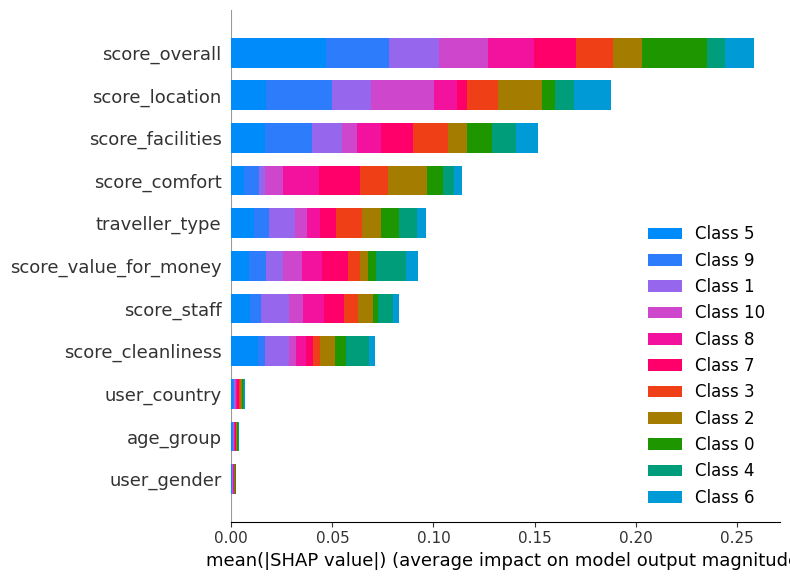

In [ ]:
from tqdm import tqdm
import numpy as np
import shap

X_sample = X_test_new.sample(n=100, random_state=42)

explainer = shap.TreeExplainer(rf_final)

shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns, plot_type="bar")

From the plot here we notice that the user_gender feature is of no use to the model. We keep this in mind for now but don't remove the feature yet, to test the new to be introduced features.

# Trying to increase accuracy

## Creating simplified numeric features without dropping the originals

In [ ]:
merged_df["score_mean"] = merged_df[[
    "score_overall", "score_facilities", "score_location",
    "score_comfort", "score_staff", "score_cleanliness", "score_value_for_money"
]].mean(axis=1)

merged_df["score_std"] = merged_df[[
    "score_overall", "score_facilities", "score_location",
    "score_comfort", "score_staff", "score_cleanliness", "score_value_for_money"
]].std(axis=1)

merged_df[["score_mean", "score_std"]].describe()


score_mean     score_std
count  50000.000000  50000.000000
mean       8.906644      0.467466
std        0.188427      0.149610
min        8.142857      0.000000
25%        8.785714      0.359232
50%        8.914286      0.461364
75%        9.042857      0.572796
max        9.542857      0.987783

### Retraining the random forest model

In [ ]:
X_train_ext = X_train_new.copy()
X_test_ext = X_test_new.copy()

X_train_ext["score_mean"] = X_train_ext[['score_overall', 'score_facilities', 'score_location', 'score_comfort', 'score_staff', 'score_cleanliness', 'score_value_for_money']].mean(axis=1)

X_train_ext["score_std"] = X_train_ext[['score_overall', 'score_facilities', 'score_location', 'score_comfort', 'score_staff', 'score_cleanliness', 'score_value_for_money']].std(axis=1)

X_test_ext["score_mean"] = X_test_ext[['score_overall', 'score_facilities', 'score_location', 'score_comfort', 'score_staff', 'score_cleanliness', 'score_value_for_money']].mean(axis=1)

X_test_ext["score_std"] = X_test_ext[['score_overall', 'score_facilities', 'score_location', 'score_comfort', 'score_staff', 'score_cleanliness', 'score_value_for_money']].std(axis=1)

rf_mean = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='sqrt',
    max_samples=0.7,
    class_weight='balanced_subsample',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_mean.fit(X_train_ext, y_train_new)

y_pred_te = rf_mean.predict(X_test_ext)
y_pred_tr = rf_mean.predict(X_train_ext)

print("Accuracy:", accuracy_score(y_test_new, y_pred_te))
print("F1-macro:", f1_score(y_test_new, y_pred_te, average='macro'))
print("Balanced Acc:", balanced_accuracy_score(y_test_new, y_pred_te))
print("Train/Test F1 gap:", f1_score(y_train_new, y_pred_tr, average='macro') -
      f1_score(y_test_new, y_pred_te, average='macro'))

Accuracy: 0.2927
F1-macro: 0.27698786312786317
Balanced Acc: 0.31121365738192547
Train/Test F1 gap: 0.1042150030647589


There was no change in accuracy or f1 so its of no use currently, however it can have a good effect with different model or different regulations so we keep the idea to try it again later.

## Creating new aggregate features

We try some feature engineering by introducing some new features such as:

1.   Mean score per traveller type
2.   Mean score per user country







In [ ]:
merged_copy_new = merged_df.copy()

merged_copy_new["avg_score_by_traveller_type"] = merged_copy_new.groupby("traveller_type")["score_overall"].transform("mean")

merged_copy_new["avg_score_by_user_country"] = merged_copy_new.groupby("user_country")["score_overall"].transform("mean")

merged_copy_new[["avg_score_by_traveller_type", "avg_score_by_user_country"]].head()


avg_score_by_traveller_type  avg_score_by_user_country
0                     8.953045                   8.938779
1                     8.940528                   8.943536
2                     8.940528                   8.952453
3                     8.818696                   8.943536
4                     9.047635                   8.938737

In [ ]:
num_new_features = [
    'score_overall', 'score_cleanliness', 'score_comfort',
    'score_facilities', 'score_location', 'score_staff',
    'score_value_for_money',
    'avg_score_by_traveller_type', 'avg_score_by_user_country'
]

cat_new_features = [
    'traveller_type', 'age_group', 'user_country']

In [ ]:
df_copy_new = merged_copy_new.copy()
te = TargetEncoder(cols=cat_new_features)
processed_df_new = te.fit_transform(df_copy_new[cat_new_features + num_new_features + ['user_gender']], df_copy_new['country_group'])


In [ ]:
X_new = processed_df_new

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

### Testing Random Forest again

In [ ]:
rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='sqrt',
    max_samples=0.7,
    class_weight='balanced_subsample',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_final.fit(X_train_new, y_train_new)

y_pred_tr = rf_final.predict(X_train_new)
y_pred_te = rf_final.predict(X_test_new)

from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

train_acc = accuracy_score(y_train_new, y_pred_tr)
test_acc  = accuracy_score(y_test_new, y_pred_te)
train_f1  = f1_score(y_train_new, y_pred_tr, average='macro')
test_f1   = f1_score(y_test_new, y_pred_te, average='macro')
train_bal = balanced_accuracy_score(y_train_new, y_pred_tr)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_te)

print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")


Accuracy  — Train: 0.385 | Test: 0.298 | Gap: 0.087
F1-macro  — Train: 0.375 | Test: 0.282 | Gap: 0.093
Bal.Acc   — Train: 0.429 | Test: 0.319 | Gap: 0.110


### Understanding what made a difference from SHAP

/tmp/ipython-input-3447376270.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns, plot_type="bar")


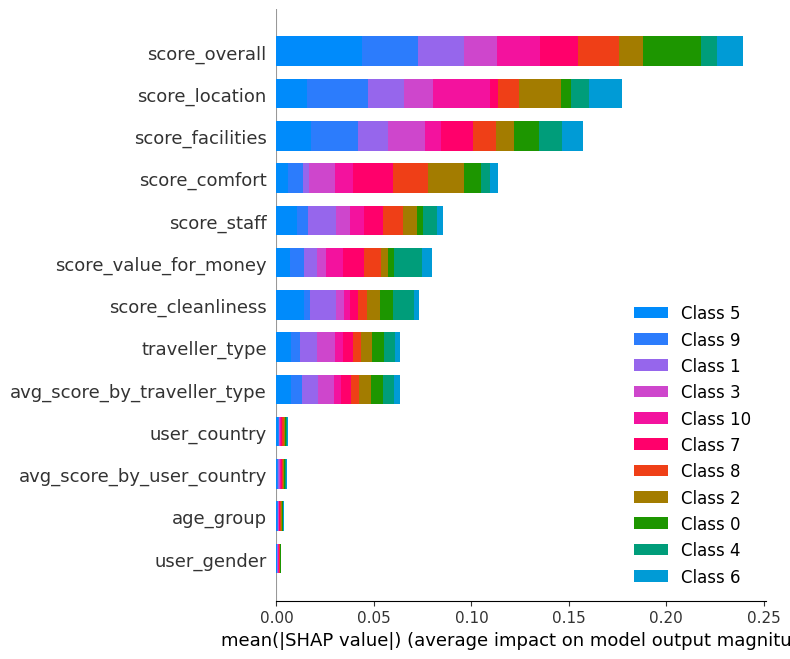

In [ ]:
X_sample = X_test_new.sample(n=100, random_state=42)

explainer = shap.TreeExplainer(rf_final)

shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns, plot_type="bar")

We conclude that avg_score_by_user_country is of no use, but avg_score_by_traveller_type is good for the model, so we keep it.

So we use temp_df to keep the avg_score_by_traveller_type feature.

In [ ]:
temp_df = df_copy_new.copy()

In [ ]:
X_train_new.drop(columns=['avg_score_by_user_country'], inplace=True)
X_test_new.drop(columns=['avg_score_by_user_country'], inplace=True)

## Trying changing user_country column into user_country_group

In [ ]:
def categorize_country(country):
    if country in ['United States', 'Canada']:
        return 'North America'
    elif country in ['Germany', 'France', 'United Kingdom', 'Netherlands', 'Spain', 'Italy']:
        return 'Western_Europe'
    elif country in ['Russia']:
        return 'Eastern_Europe'
    elif country in ['China', 'Japan', 'South Korea']:
        return 'East_Asia'
    elif country in ['Thailand', 'Singapore']:
        return 'Southeast_Asia'
    elif country in ['United Arab Emirates', 'Turkey']:
        return 'Middle_East'
    elif country in ['Egypt', 'Nigeria', 'South Africa']:
        return 'Africa'
    elif country in ['Australia', 'New Zealand']:
        return 'Oceania'
    elif country in ['Brazil', 'Argentina']:
        return 'South_America'
    elif country in ['India']:
        return 'South_Asia'
    elif country in ['Mexico']:
        return 'North_America_Mexico'
    else:
        return 'Other'

df_copy_new['user_country_grouped'] = df_copy_new['user_country'].apply(categorize_country)

df_copy_new = df_copy_new.drop(columns=['user_country'])

df_copy_new.head()

review_id  user_id  hotel_id review_date  score_overall  score_cleanliness  \
0          1     1600         1  2022-10-07            8.7                8.6   
1          2      432         4  2020-03-24            9.1               10.0   
2          3      186        18  2023-12-18            8.8                9.7   
3          4     1403        19  2022-06-22            8.9                9.0   
4          5     1723        17  2022-07-02            9.1                8.9   

   score_comfort  score_facilities  score_location  score_staff  ...  \
0            8.7               8.5             9.0          8.8  ...   
1            9.1               9.0             8.6          9.4  ...   
2            8.8               8.3             8.7          8.1  ...   
3            8.8               8.5             9.6          9.1  ...   
4            9.5               9.3             8.3          9.4  ...   

   user_gender age_group traveller_type   join_date country_group_encoded  \
0            1     25-34           Solo  2021-03-21                     4   
1            1     35-44         Couple  2025-04-01                     1   
2            1       55+         Couple  2021-10-28                     0   
3            1     35-44       Business  2023-10-10                    10   
4            0     45-54         Family  2023-02-28                     2   

   score_mean  score_std  avg_score_by_traveller_type  \
0    8.714286   0.157359                     8.953045   
1    9.114286   0.484522                     8.940528   
2    8.714286   0.508031                     8.940528   
3    8.885714   0.422013                     8.818696   
4    9.057143   0.407665                     9.047635   

   avg_score_by_user_country  user_country_grouped  
0                   8.938779               Oceania  
1                   8.943536        Western_Europe  
2                   8.952453        Western_Europe  
3                   8.943536        Western_Europe  
4                   8.938737               Oceania  

[5 rows x 35 columns]

In [ ]:
num_features_trial = [
    'score_overall', 'score_cleanliness', 'score_comfort',
    'score_facilities', 'score_location', 'score_staff',
    'score_value_for_money', 'avg_score_by_traveller_type'
]

cat_features_trial = [
    'traveller_type', 'age_group', 'user_country_grouped']

In [ ]:
te = TargetEncoder(cols=cat_features_trial)
processed_df_new = te.fit_transform(df_copy_new[cat_features_trial + num_features_trial + ['user_gender']], df_copy_new['country_group'])


In [ ]:
X_new = processed_df_new

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

### Testing Random Forest again

In [ ]:
rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='sqrt',
    max_samples=0.7,
    class_weight='balanced_subsample',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_final.fit(X_train_new, y_train_new)

y_pred_tr = rf_final.predict(X_train_new)
y_pred_te = rf_final.predict(X_test_new)

from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

train_acc = accuracy_score(y_train_new, y_pred_tr)
test_acc  = accuracy_score(y_test_new, y_pred_te)
train_f1  = f1_score(y_train_new, y_pred_tr, average='macro')
test_f1   = f1_score(y_test_new, y_pred_te, average='macro')
train_bal = balanced_accuracy_score(y_train_new, y_pred_tr)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_te)

print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")


Accuracy  — Train: 0.380 | Test: 0.296 | Gap: 0.084
F1-macro  — Train: 0.370 | Test: 0.281 | Gap: 0.089
Bal.Acc   — Train: 0.424 | Test: 0.319 | Gap: 0.105


We can see that it has a negative effect on the accuracy so we forget about this idea.

In [ ]:
X_train_new.drop(columns=['user_country_grouped'], inplace=True)
X_test_new.drop(columns=['user_country_grouped'], inplace=True)

## Trying to not use user_country at all

In [ ]:
rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='sqrt',
    max_samples=0.7,
    class_weight='balanced_subsample',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_final.fit(X_train_new, y_train_new)

y_pred_tr = rf_final.predict(X_train_new)
y_pred_te = rf_final.predict(X_test_new)

from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

train_acc = accuracy_score(y_train_new, y_pred_tr)
test_acc  = accuracy_score(y_test_new, y_pred_te)
train_f1  = f1_score(y_train_new, y_pred_tr, average='macro')
test_f1   = f1_score(y_test_new, y_pred_te, average='macro')
train_bal = balanced_accuracy_score(y_train_new, y_pred_tr)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_te)

print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")


Accuracy  — Train: 0.377 | Test: 0.297 | Gap: 0.080
F1-macro  — Train: 0.367 | Test: 0.282 | Gap: 0.085
Bal.Acc   — Train: 0.420 | Test: 0.318 | Gap: 0.101


We can see that it also has a negative effect on the accuracy.

In [ ]:
X_train_new['user_country'] = merged_df['user_country']
X_test_new['user_country'] = merged_df['user_country']

## Trying removing user_gender

In [ ]:
num_features_trial = [
    'score_overall', 'score_cleanliness', 'score_comfort',
    'score_facilities', 'score_location', 'score_staff',
    'score_value_for_money', 'avg_score_by_traveller_type'
]

cat_features_trial = [
    'traveller_type', 'age_group']

In [ ]:
df_copy_new['avg_score_by_traveller_type'] = temp_df['avg_score_by_traveller_type']
te = TargetEncoder(cols=cat_features_trial)
processed_df_new = te.fit_transform(df_copy_new[cat_features_trial + num_features_trial], df_copy_new['country_group'])


In [ ]:
X_new = processed_df_new

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

### Testing Random Forest again

In [ ]:
rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='sqrt',
    max_samples=0.7,
    class_weight='balanced_subsample',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_final.fit(X_train_new, y_train_new)

y_pred_tr = rf_final.predict(X_train_new)
y_pred_te = rf_final.predict(X_test_new)

from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

train_acc = accuracy_score(y_train_new, y_pred_tr)
test_acc  = accuracy_score(y_test_new, y_pred_te)
train_f1  = f1_score(y_train_new, y_pred_tr, average='macro')
test_f1   = f1_score(y_test_new, y_pred_te, average='macro')
train_bal = balanced_accuracy_score(y_train_new, y_pred_tr)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_te)

print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")


Accuracy  — Train: 0.376 | Test: 0.297 | Gap: 0.078
F1-macro  — Train: 0.366 | Test: 0.283 | Gap: 0.083
Bal.Acc   — Train: 0.418 | Test: 0.321 | Gap: 0.098


**Has a negative effect**

## Trying to use join date of the user

In [ ]:
num_features_trial = [
    'score_overall', 'score_cleanliness', 'score_comfort',
    'score_facilities', 'score_location', 'score_staff',
    'score_value_for_money', 'avg_score_by_traveller_type', 'user_join_year'
]

cat_features_trial = [
    'traveller_type', 'age_group', 'user_country']

In [ ]:
merged_df["user_join_year"] = pd.to_datetime(merged_df["join_date"]).dt.year
df_copy_new = merged_df.copy()
df_copy_new['avg_score_by_traveller_type'] = temp_df['avg_score_by_traveller_type']
te = TargetEncoder(cols=cat_features_trial)
processed_df_new = te.fit_transform(df_copy_new[cat_features_trial + num_features_trial + ['user_gender']], df_copy_new['country_group'])


In [ ]:
X_new = processed_df_new

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

## Handling Imbalance

Now is the time to handle the imbalance and check the accuracy

We try balancing using SMOTETomek which combines oversampling SMOT and undersampling technique.

In [ ]:
smt = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smt.fit_resample(X_train_new, y_train_new)

In [ ]:
rf_bal = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    max_features='sqrt',
    max_samples=0.7,
    class_weight=None,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_bal.fit(X_train_bal, y_train_bal)

y_pred_tr = rf_bal.predict(X_train_bal)
y_pred_te = rf_bal.predict(X_test_new)

from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

train_acc = accuracy_score(y_train_bal, y_pred_tr)
test_acc  = accuracy_score(y_test_new, y_pred_te)
train_f1  = f1_score(y_train_bal, y_pred_tr, average='macro')
test_f1   = f1_score(y_test_new, y_pred_te, average='macro')
train_bal = balanced_accuracy_score(y_train_bal, y_pred_tr)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_te)

print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")


Accuracy  — Train: 0.457 | Test: 0.317 | Gap: 0.140
F1-macro  — Train: 0.449 | Test: 0.282 | Gap: 0.167
Bal.Acc   — Train: 0.456 | Test: 0.301 | Gap: 0.155


We can see that the accuracy did increase which implies that the balancing is useful, however we can try another technique of balancing.

## Trying one last time with Random Forest

### Defining new features

In [ ]:
num_features = [
    'score_overall', 'score_cleanliness', 'score_comfort',
    'score_facilities', 'score_location', 'score_staff',
    'score_value_for_money'
]

cat_features = [
    'traveller_type', 'age_group'
]

### Encoding the target

In [ ]:
final_try_df = merged_df.copy()
final_try_df['country_group_encoded'] = le.fit_transform(final_try_df['country_group'])
y = final_try_df['country_group_encoded']

### Feature Engineering some new features

#### Creating new features from review date

In [ ]:
final_try_df["review_date_year"] = pd.to_datetime(final_try_df["review_date"]).dt.year

#### Creating new features using score features

In [ ]:
final_try_df["score_mean"] = final_try_df[num_features].mean(axis=1)
final_try_df["score_std"] = final_try_df[num_features].std(axis=1)

Showing on plot average overall score by year.

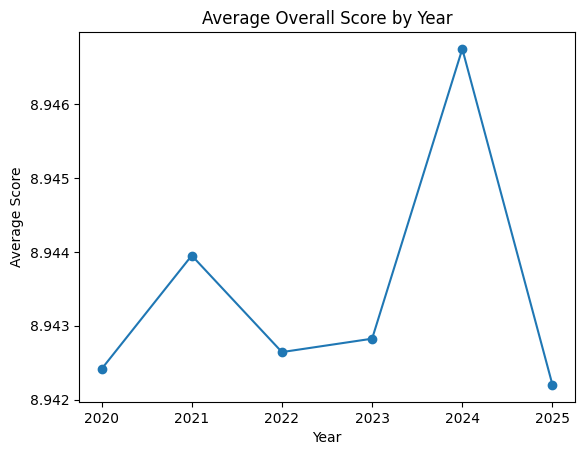

In [ ]:
plt.figure()
final_try_df.groupby('review_date_year')['score_overall'].mean().plot(kind='line', marker='o')
plt.title('Average Overall Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

#### Adding the newly introduced features

In [ ]:
final_try_df['avg_score_traveller_type'] = temp_df['avg_score_by_traveller_type']
num_features = num_features + ['review_date_year' ,'score_mean', 'score_std', 'avg_score_traveller_type']

#### Trying OHE with standard scalling

In [ ]:
X_ohe_new = ohe_model.fit_transform(final_try_df[cat_features])
encoded_df_new = pd.DataFrame(
    X_ohe_new,
    columns=ohe_model.get_feature_names_out(cat_features),
    index=final_try_df.index
)

X_scaled_new = scaler_model.fit_transform(final_try_df[num_features])
scaled_df_new = pd.DataFrame(
    X_scaled_new,
    columns=num_features,
    index=final_try_df.index
)

#### Combining processed data

In [ ]:
processed_df_new = pd.concat([encoded_df_new, scaled_df_new, df_copy_new['user_gender']], axis=1)
X_new = processed_df_new

#### Trying new balancing technique

In [ ]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_new, y)

#### Splitting train, test

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

#### Testing the Random Forest

In [ ]:
rf_final = RandomForestClassifier(
    n_estimators=600,
    max_depth=11,
    min_samples_leaf=2,
    min_samples_split=6,
    max_features='sqrt',
    class_weight='balanced_subsample',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_final.fit(X_train_new, y_train_new)

y_pred_tr = rf_final.predict(X_train_new)
y_pred_te = rf_final.predict(X_test_new)

train_acc = accuracy_score(y_train_new, y_pred_tr)
test_acc  = accuracy_score(y_test_new, y_pred_te)
train_f1  = f1_score(y_train_new, y_pred_tr, average='macro')
test_f1   = f1_score(y_test_new, y_pred_te, average='macro')
train_bal = balanced_accuracy_score(y_train_new, y_pred_tr)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_te)

print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")

Accuracy  — Train: 0.507 | Test: 0.439 | Gap: 0.068
F1-macro  — Train: 0.504 | Test: 0.430 | Gap: 0.073
Bal.Acc   — Train: 0.507 | Test: 0.439 | Gap: 0.068


#### Plotting model performance

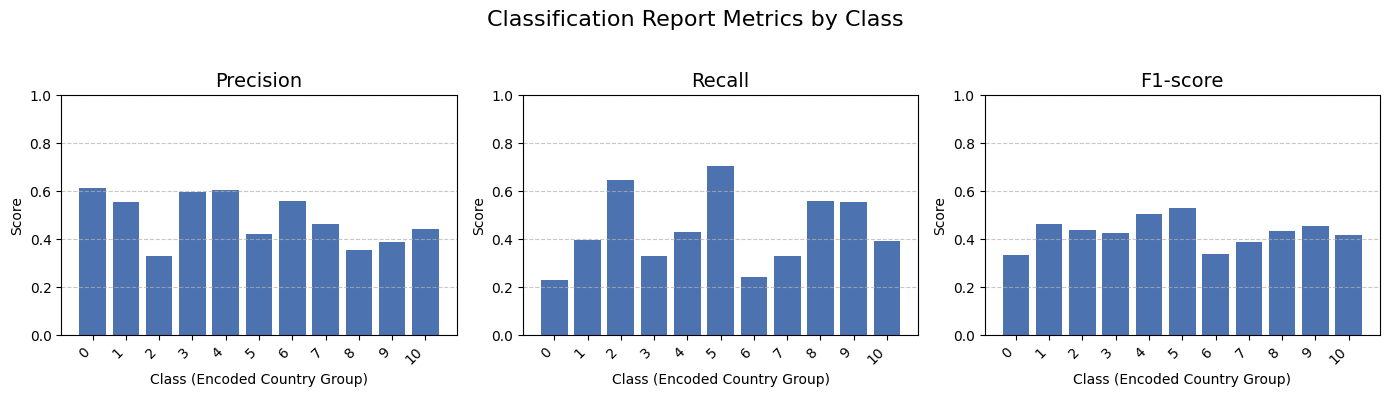

In [ ]:
report = classification_report(y_test_new, y_pred_te, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics = ['precision', 'recall', 'f1-score']

plt.figure(figsize=(14, 4))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    plt.bar(report_df.index.astype(str), report_df[metric], color='#4C72B0')
    plt.title(metric.capitalize(), fontsize=14)
    plt.xlabel('Class (Encoded Country Group)')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Classification Report Metrics by Class', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

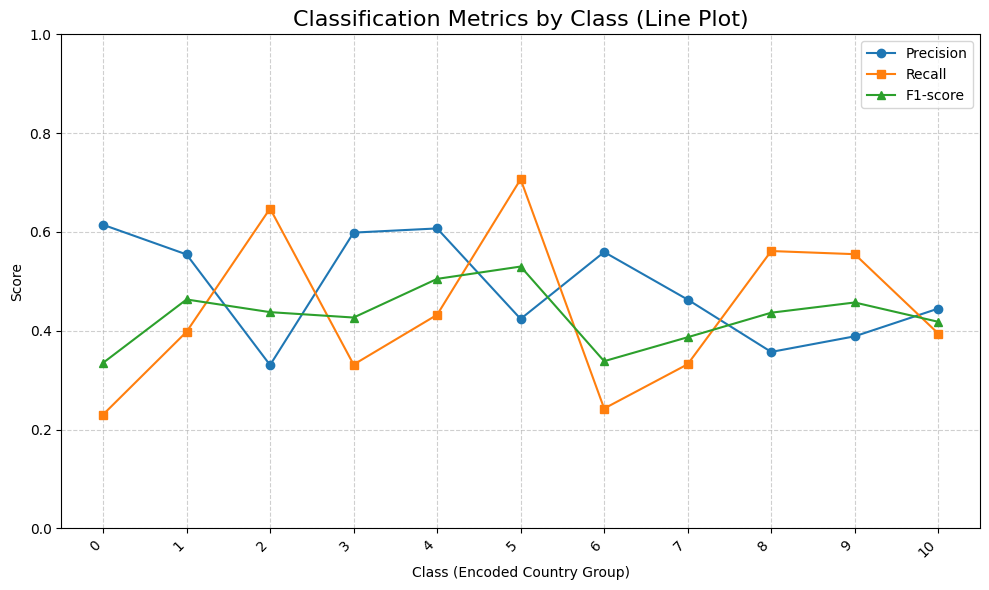

In [ ]:
report = classification_report(y_test_new, y_pred_te, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

plt.figure(figsize=(10, 6))
plt.plot(report_df.index.astype(str), report_df['precision'], marker='o', label='Precision')
plt.plot(report_df.index.astype(str), report_df['recall'], marker='s', label='Recall')
plt.plot(report_df.index.astype(str), report_df['f1-score'], marker='^', label='F1-score')

plt.title('Classification Metrics by Class (Line Plot)', fontsize=16)
plt.xlabel('Class (Encoded Country Group)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can see that model performance increased significantly which implies that the new features + SMOT balancing technique + OHE + Standard scalling is the best compound that increase the model accuracy.

#### Using Global SHAP

We use Global SHAP to make sure what features highly affect the model

/tmp/ipython-input-1267967707.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns, plot_type="bar")


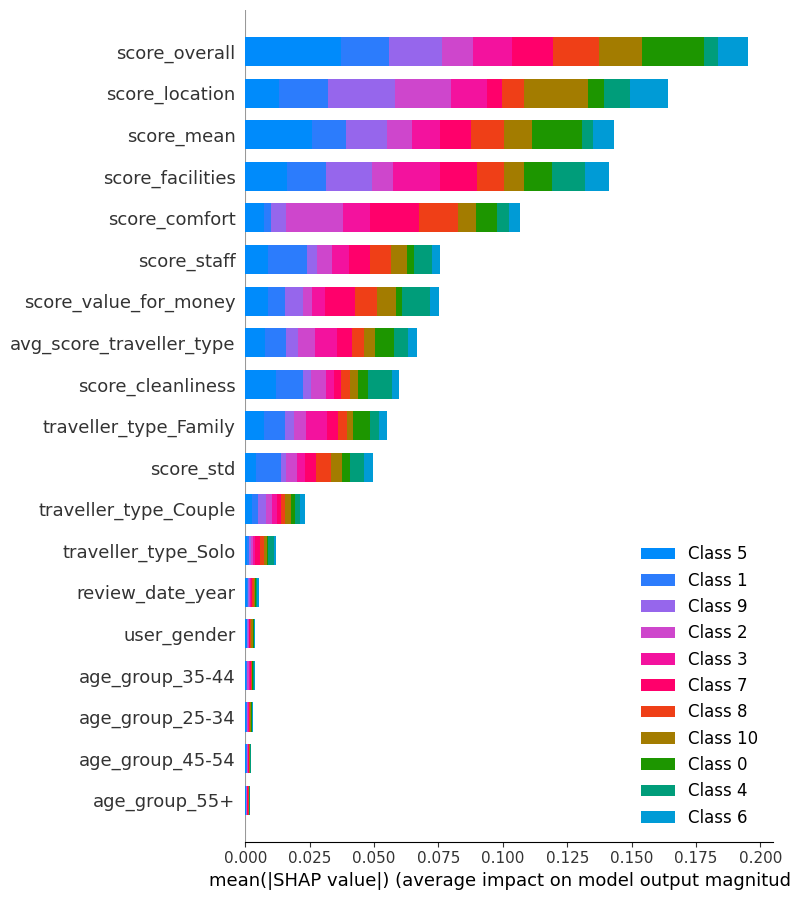

In [ ]:
X_sample = X_test_new.sample(n=100, random_state=42).copy()

explainer = shap.TreeExplainer(rf_final)

shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns, plot_type="bar")

#### Using Lime for local explanation

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


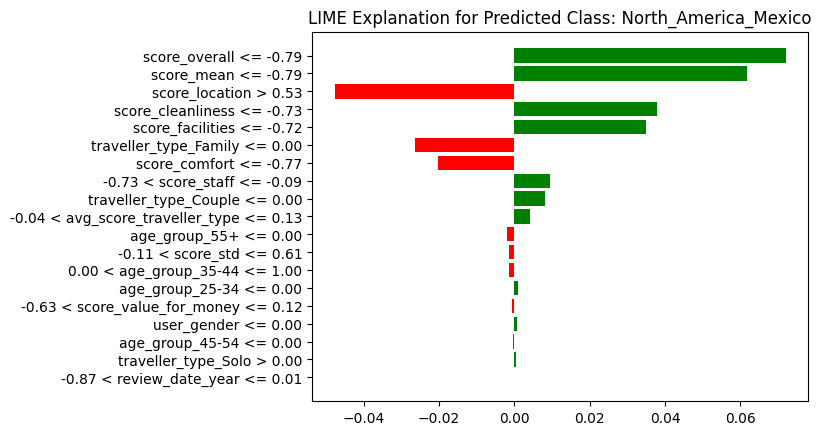

In [ ]:
class_names = le.inverse_transform(np.arange(len(le.classes_)))

i = 5000
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train_new.values,
    feature_names=X_train_new.columns.tolist(),
    class_names=class_names.tolist(),
    discretize_continuous=True,
    mode='classification',
    random_state=42
)

instance = X_test_new.iloc[i].values

y_true_encoded = y_test_new.iloc[i]
y_pred_encoded = rf_final.predict(X_test_new.iloc[[i]])[0]

y_true_label = le.inverse_transform([y_true_encoded])[0]
y_pred_label = le.inverse_transform([y_pred_encoded])[0]


pred_class_index = np.where(le.classes_ == y_pred_label)[0][0]

exp = explainer_lime.explain_instance(
    data_row=instance,
    predict_fn=rf_final.predict_proba,
    num_features=X_test_new.shape[1],
    labels=[pred_class_index]
)

available_labels = list(exp.local_exp.keys())
if pred_class_index not in available_labels:
    label_to_plot = available_labels[0]
else:
    label_to_plot = pred_class_index

exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure(label=label_to_plot)
plt.title(f"LIME Explanation for Predicted Class: {y_pred_label}")
plt.show()

# Trying new Model (Light GBM)

Now that we deduced the best compound of features, balancing technique and encodings its time to test new models.

In [ ]:
lgbm_model_tuned = LGBMClassifier(
    objective='multiclass',
    num_class=len(y_train_new.unique()),
    boosting_type='gbdt',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=2.0,
    random_state=42,
    n_jobs=1,
    min_child_weight=20
)

## Train with early stopping


In [ ]:
print("Training LightGBM model...")
lgbm_model_tuned.fit(
    X_train_new, y_train_new,
    eval_set=[(X_train_new, y_train_new), (X_test_new, y_test_new)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(100), log_evaluation(100)]
)

Training LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3658
[LightGBM] [Info] Number of data points in the train set: 104508, number of used features: 19
[LightGBM] [Info] Start training from score -2.399341
[LightGBM] [Info] Start training from score -2.398393
[LightGBM] [Info] Start training from score -2.393561
[LightGBM] [Info] Start training from score -2.401240
[LightGBM] [Info] Start training from score -2.393561
[LightGBM] [Info] Start training from score -2.394819
[LightGBM] [Info] Start training from score -2.399552
[LightGBM] [Info] Start training from score -2.398182
[LightGBM] [Info] Start training from score -2.398393
[LightGBM] [Info] Start training from score -2.404308
[LightGBM] [Info] Start training from score -2.395554
Training until validation

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, min_child_weight=20,
               n_estimators=500, n_jobs=1, num_class=11, objective='multiclass',
               random_state=42, reg_alpha=1.0, reg_lambda=2.0, subsample=0.8)

## Evaluate model

In [ ]:
print("\nEvaluating model...")
y_pred_tr = lgbm_model_tuned.predict(X_train_new)
y_pred_te = lgbm_model_tuned.predict(X_test_new)

train_acc = accuracy_score(y_train_new, y_pred_tr)
test_acc  = accuracy_score(y_test_new, y_pred_te)
train_f1  = f1_score(y_train_new, y_pred_tr, average='macro')
test_f1   = f1_score(y_test_new, y_pred_te, average='macro')
train_bal = balanced_accuracy_score(y_train_new, y_pred_tr)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_te)


Evaluating model...


### Display results

In [ ]:
print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")

Accuracy  — Train: 0.697 | Test: 0.567 | Gap: 0.130
F1-macro  — Train: 0.695 | Test: 0.561 | Gap: 0.134
Bal.Acc   — Train: 0.697 | Test: 0.568 | Gap: 0.129


### Using Global SHAP

/tmp/ipython-input-249819489.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns, plot_type="bar")


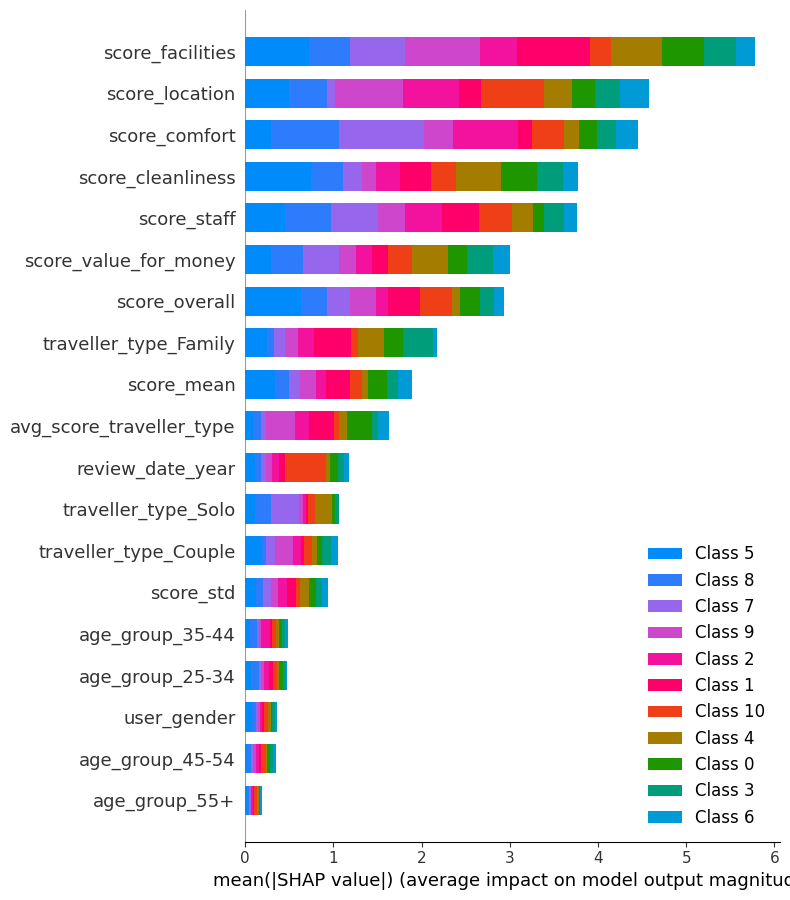

In [ ]:
X_sample = X_test_new.sample(n=100, random_state=42).copy()
explainer = shap.TreeExplainer(lgbm_model_tuned)
shap_values = explainer.shap_values(X_sample)
shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns, plot_type="bar")

### Using Lime for Local Explanation

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


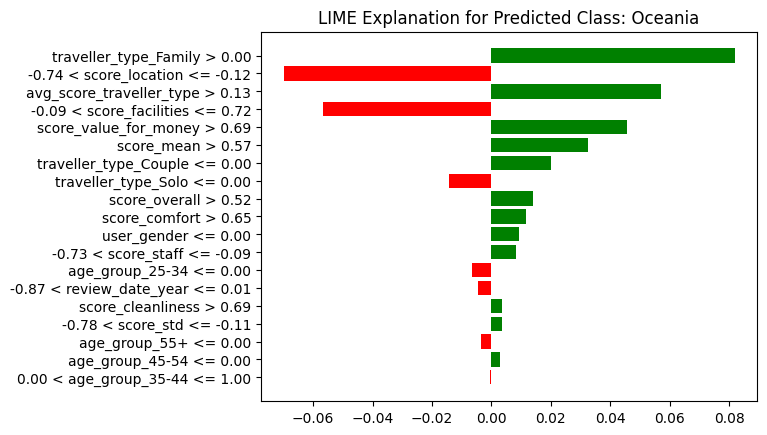

In [ ]:

class_names = le.inverse_transform(np.arange(len(le.classes_)))

i = 1000

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_new.values,
    feature_names=X_train_new.columns.tolist(),
    class_names=class_names.tolist(),
    discretize_continuous=True,
    mode='classification',
    random_state=42
)

instance = X_test_new.iloc[i].values

y_true_encoded = y_test_new.iloc[i]
y_pred_encoded = lgbm_model_tuned.predict(X_test_new.iloc[[i]])[0]

y_true_label = le.inverse_transform([y_true_encoded])[0]
y_pred_label = le.inverse_transform([y_pred_encoded])[0]

pred_class_index = np.where(le.classes_ == y_pred_label)[0][0]

exp = explainer_lime.explain_instance(
    data_row=instance,
    predict_fn=lgbm_model_tuned.predict_proba,
    num_features=X_test_new.shape[1],
    labels=[pred_class_index]
)

available_labels = list(exp.local_exp.keys())
label_to_plot = pred_class_index if pred_class_index in available_labels else available_labels[0]

exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure(label=label_to_plot)
plt.title(f"LIME Explanation for Predicted Class: {y_pred_label}")
plt.show()

#Trying new model (FFNN)

In [ ]:
y_train_cat = to_categorical(y_train_new)
y_test_cat  = to_categorical(y_test_new)
num_classes = y_train_cat.shape[1]

final_model = Sequential([
    Input(shape = (X_train_new.shape[1],)),
    Dense(512),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.1),

    Dense(256),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.1),

    Dense(128),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.1),

    Dense(64),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.1),

    Dense(num_classes, activation='softmax')
])

final_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# --- Train model
history = final_model.fit(
    X_train_new, y_train_cat,
    validation_data=(X_test_new, y_test_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# --- Predict
y_pred_train_prob = final_model.predict(X_train_new)
y_pred_test_prob = final_model.predict(X_test_new)
y_pred_train = y_pred_train_prob.argmax(axis=1)
y_pred_test = y_pred_test_prob.argmax(axis=1)

# --- Evaluate
train_acc = accuracy_score(y_train_new, y_pred_train)
test_acc  = accuracy_score(y_test_new, y_pred_test)
train_f1  = f1_score(y_train_new, y_pred_train, average='macro')
test_f1   = f1_score(y_test_new, y_pred_test, average='macro')
train_bal = balanced_accuracy_score(y_train_new, y_pred_train)
test_bal  = balanced_accuracy_score(y_test_new, y_pred_test)

# --- Display results
print("\n=== FFNN Model Performance ===")
print(f"Accuracy  — Train: {train_acc:.3f} | Test: {test_acc:.3f} | Gap: {train_acc - test_acc:.3f}")
print(f"F1-macro  — Train: {train_f1:.3f} | Test: {test_f1:.3f} | Gap: {train_f1 - test_f1:.3f}")
print(f"Bal.Acc   — Train: {train_bal:.3f} | Test: {test_bal:.3f} | Gap: {train_bal - test_bal:.3f}")

Epoch 1/100
3266/3266 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.2725 - loss: 1.9648 - val_accuracy: 0.3424 - val_loss: 1.7597
Epoch 2/100
3266/3266 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.3388 - loss: 1.7601 - val_accuracy: 0.3691 - val_loss: 1.6644
Epoch 3/100
3266/3266 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3596 - loss: 1.6941 - val_accuracy: 0.3682 - val_loss: 1.6532
Epoch 4/100
3266/3266 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3725 - loss: 1.6587 - val_accuracy: 0.3791 - val_loss: 1.6258
Epoch 5/100
3266/3266 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3807 - loss: 1.6328 - val_accuracy: 0.3928 - val_loss: 1.5912
Epoch 6/100
3266/3266 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.3933 - loss: 1.6069 - val_accuracy: 0.4040 - val_loss: 1.5802
Epoch 7/100
3266/3266 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.3960 - loss: 1.5925 - val_accuracy: 0.4204 - val_loss: 1.5435
Epoch 8/100
3266/3266 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4093 -

####Displaying Results

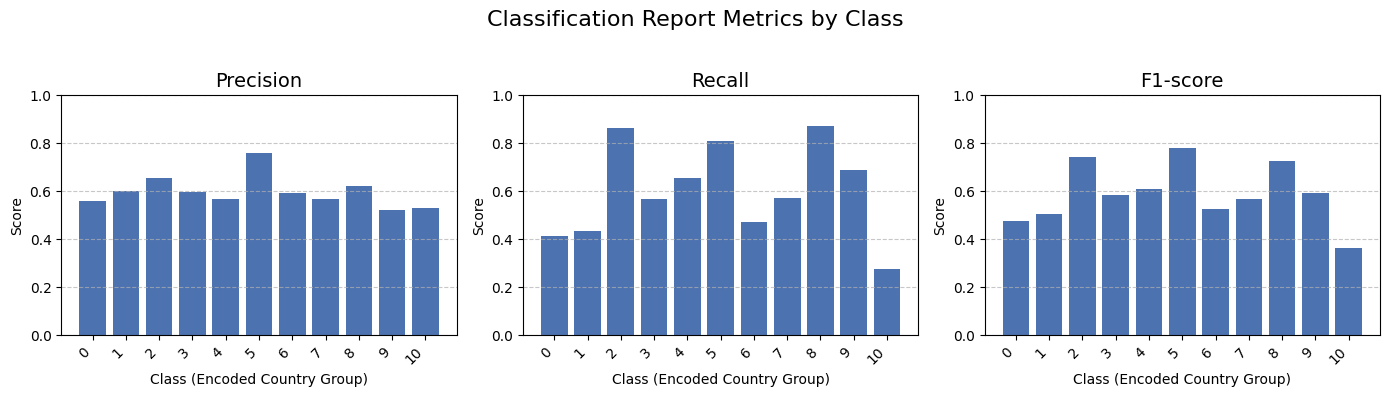

In [ ]:
report = classification_report(y_test_enc, y_pred_test, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics = ['precision', 'recall', 'f1-score']

plt.figure(figsize=(14, 4))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    plt.bar(report_df.index.astype(str), report_df[metric], color='#4C72B0')
    plt.title(metric.capitalize(), fontsize=14)
    plt.xlabel('Class (Encoded Country Group)')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Classification Report Metrics by Class', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


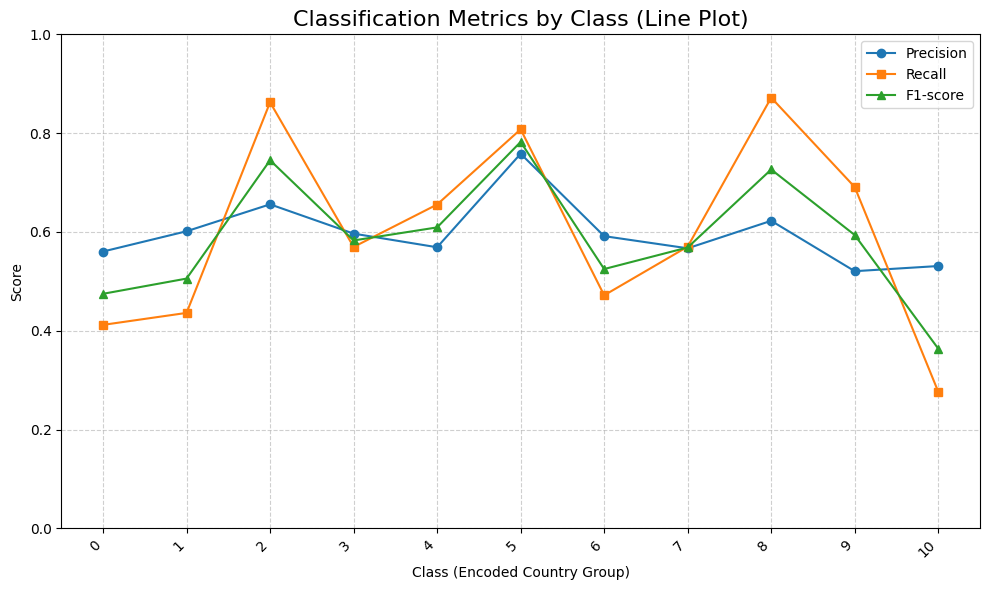

In [ ]:
report = classification_report(y_test_enc, y_pred_test, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

plt.figure(figsize=(10, 6))
plt.plot(report_df.index.astype(str), report_df['precision'], marker='o', label='Precision')
plt.plot(report_df.index.astype(str), report_df['recall'], marker='s', label='Recall')
plt.plot(report_df.index.astype(str), report_df['f1-score'], marker='^', label='F1-score')

plt.title('Classification Metrics by Class (Line Plot)', fontsize=16)
plt.xlabel('Class (Encoded Country Group)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Since this is the model with highest performance it will be our go to model.

#### Using SHAP for global explanation

PermutationExplainer explainer: 501it [01:00,  6.92it/s]
/tmp/ipython-input-3809113924.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values, X_sample_new, feature_names=X_sample_new.columns, plot_type='bar')


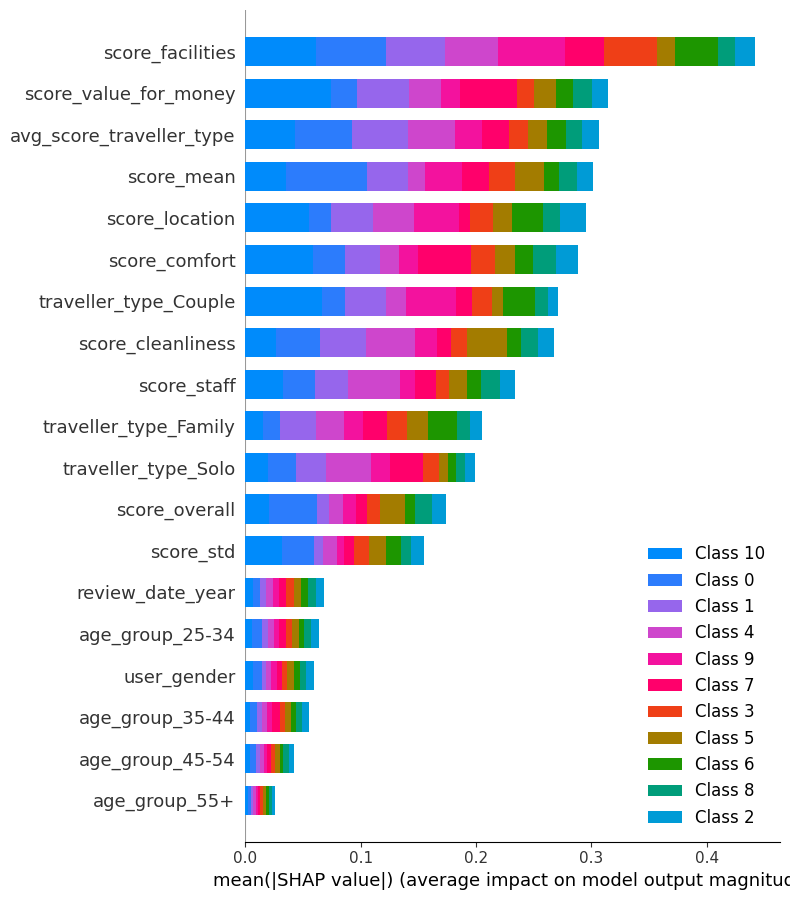

In [ ]:
X_sample_new = X_test_new.sample(n=500, random_state=42).copy()
background = shap.sample(X_train_new, 100, random_state=42)
explainer = shap.Explainer(final_model, background)
shap_values = explainer(X_sample_new)

shap.summary_plot(shap_values.values, X_sample_new, feature_names=X_sample_new.columns, plot_type='bar')

#### Using Lime for Local Explanation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


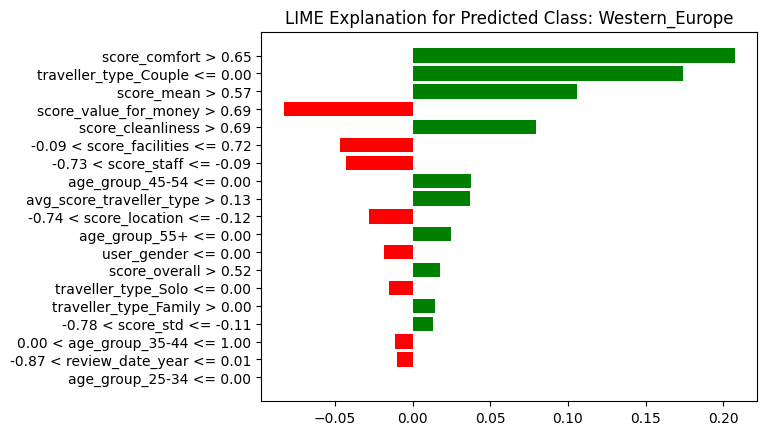

In [ ]:

# --- Class names
class_names = le.inverse_transform(np.arange(len(le.classes_)))

# --- Choose an instance to explain
i = 1000
instance = X_test_new.iloc[i].values
y_true_encoded = y_test_new.iloc[i]
y_pred_encoded = final_model.predict(np.expand_dims(instance, axis=0)).argmax(axis=1)[0]

y_true_label = le.inverse_transform([y_true_encoded])[0]
y_pred_label = le.inverse_transform([y_pred_encoded])[0]

pred_class_index = np.where(le.classes_ == y_pred_label)[0][0]

# --- LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_new.values,
    feature_names=X_train_new.columns.tolist(),
    class_names=class_names.tolist(),
    discretize_continuous=True,
    mode='classification',
    random_state=42
)

# --- Explain the chosen instance
exp = explainer_lime.explain_instance(
    data_row=instance,
    predict_fn=final_model.predict,  # Keras predict function
    num_features=X_test_new.shape[1],
    labels=[pred_class_index]
)

available_labels = list(exp.local_exp.keys())
label_to_plot = pred_class_index if pred_class_index in available_labels else available_labels[0]

# --- Display explanation
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure(label=label_to_plot)
plt.title(f"LIME Explanation for Predicted Class: {y_pred_label}")
plt.show()


# **Creating the inference function**

saving artifacts for later to:
*   reproduce predictions exactly, without re-training.
*   guarante the same preprocessing (same encoding mapping, same scaling means) is applied at inference time as during training.

Saved files (.joblib, .keras) can be loaded in a web service, script, or another machine to serve predictions. Models + preprocessors are the entire “runtime” needed for inference.





In [ ]:
import joblib, os

OHE_VAR = 'ohe_model'
SCALER_VAR = 'scaler_model'
LE_VAR = 'le'
Final_MODEL_VAR = 'final_model'

def get_glob(name):
    if name in globals():
        return globals()[name]
    else:
        print(f"Warning: variable '{name}' not found in globals(). Update the name or re-run training.")
        return None

ohe_obj = get_glob(OHE_VAR)
scaler_obj = get_glob(SCALER_VAR)
le_obj = get_glob(LE_VAR)
final_model_obj = get_glob(Final_MODEL_VAR)

if ohe_obj is not None:
    joblib.dump(ohe_obj, 'ohe_model.joblib')
if scaler_obj is not None:
    joblib.dump(scaler_obj, 'scaler_model.joblib')
if le_obj is not None:
    joblib.dump(le_obj, 'labelencoder.joblib')
if final_model_obj is not None:
    joblib.dump(final_model_obj, 'final_model_logreg.joblib')

avg_score_by_traveller_type_dict = temp_df["avg_score_by_traveller_type"]

joblib.dump(avg_score_by_traveller_type_dict, 'avg_score_by_traveller_type.joblib')



print("Saved files on disk:")
for f in ['ohe_model.joblib','scaler_model.joblib','labelencoder.joblib','final_model_logreg.joblib', 'avg_score_by_traveller_type.joblib']:
    print(f"  {f}: {os.path.exists(f)}")


Saved files on disk:
  ohe_model.joblib: True
  scaler_model.joblib: True
  labelencoder.joblib: True
  final_model_logreg.joblib: True
  avg_score_by_traveller_type.joblib: True


In [ ]:
import json
meta = {
  'num_features': num_features,
  'cat_features': cat_features,
  'processed_columns': list(processed_df.columns) if 'processed_df_new' in globals() else None
}
with open('model_metadata.json','w') as f:
    json.dump(meta, f)
print("Saved model_metadata.json")


Saved model_metadata.json


NEXT STEPS: Load saved artifacts → turn a raw single-row input into the exact processed feature vector used at training → call the saved model → map numeric output to label → return result.

## STEP 1: Load saved artifacts

In [ ]:
_art = {}  # cache of loaded artifacts

def load_artifacts():
    global _art
    if _art:
        return _art
    # Preprocessors
    _art['ohe'] = joblib.load('ohe_model.joblib') if os.path.exists('ohe_model.joblib') else None
    _art['scaler'] = joblib.load('scaler_model.joblib') if os.path.exists('scaler_model.joblib') else None
    # Label encoder
    _art['le'] = joblib.load('labelencoder.joblib') if os.path.exists('labelencoder.joblib') else None
    # Model
    _art['model'] = joblib.load('final_model_logreg.joblib') if os.path.exists('final_model_logreg.joblib') else None
    # Load the new artifact
    _art['avg_score_by_traveller_type'] = joblib.load('avg_score_by_traveller_type.joblib') if os.path.exists('avg_score_by_traveller_type.joblib') else {}


    return _art

load_artifacts()

{'ohe': OneHotEncoder(drop='first', sparse_output=False),
 'scaler': StandardScaler(),
 'le': LabelEncoder(),
 'model': <Sequential name=sequential_5, built=True>,
 'avg_score_by_traveller_type': 0        8.953045
 1        8.940528
 2        8.940528
 3        8.818696
 4        9.047635
            ...   
 49995    8.818696
 49996    8.940528
 49997    8.940528
 49998    8.953045
 49999    9.047635
 Name: avg_score_by_traveller_type, Length: 50000, dtype: float64}

## STEP 2: Determine expected feature names (numerical and categorical features)

In [ ]:
def get_feature_info():
    art = load_artifacts()
    meta = art.get('meta', {})
    num_features = meta.get('num_new_features', globals().get('num_features', []))
    cat_features = meta.get('cat_features', globals().get('cat_features', []))
    processed_columns = meta.get('processed_columns')
    return num_features, cat_features, processed_columns

num_features, cat_features, processed_columns = get_feature_info()
print("num_features:", num_features)
print("cat_features:", cat_features)
print("processed_columns:", processed_columns)


num_features: ['score_overall', 'score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money', 'review_date_year', 'score_mean', 'score_std', 'avg_score_traveller_type']
cat_features: ['traveller_type', 'age_group']
processed_columns: None


## STEP 3: Preparing the raw single-row input & fill defaults

In [ ]:
def fill_defaults(raw, num_features, cat_features):
    x = dict(raw)  # shallow copy
    for c in num_features:
        if c not in x or x[c] is None:
            x[c] = 0.0
    for c in cat_features:
        if c not in x or x[c] is None:
            # Fill missing categorical features with the mode from the original merged_df
            if 'merged_df' in globals() and c in globals()['merged_df'].columns:
                x[c] = globals()['merged_df'][c].mode().iloc[0]
            else:
                # Fallback to 'missing' if merged_df or column not found
                x[c] = 'missing'

    if 'user_gender' not in cat_features:
      if 'user_gender' not in x or x['user_gender'] is None:
           x['user_gender'] = merged_df['user_gender'].mode().iloc[0] if 'merged_df' in globals() else 0 # Default to 0 if merged_df is not available

    # Calculate new features if they are expected
    if 'review_date_year' in num_features and 'review_date' in x and pd.notna(x['review_date']):
        try:
            x['review_date_year'] = pd.to_datetime(x['review_date']).year
        except Exception:
            x['review_date_year'] = 0 # Default to 0 if date parsing fails

    score_cols = [col for col in ['score_overall', 'score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money'] if col in x and pd.notna(x[col])]
    if 'score_mean' in num_features and score_cols:
        x['score_mean'] = pd.Series([x[col] for col in score_cols]).mean()
    else:
        x['score_mean'] = 0.0 # Default if not all score columns are present

    if 'score_std' in num_features and score_cols and len(score_cols) > 1:
        x['score_std'] = pd.Series([x[col] for col in score_cols]).std()
    else:
        x['score_std'] = 0.0 # Default if not enough score columns or no variation


    return x

## STEP 4: Encode categorical features using saved OneHotEncoder and map the user_gender column

In [ ]:
def encode_categorical(df_row, ohe, cat_features):
    if ohe is None or not cat_features:
        return pd.DataFrame(index=[0])  # empty
    X_cat = ohe.transform(df_row[cat_features])
    # build column names robustly:
    try:
        cat_names = list(ohe.get_feature_names_out(cat_features))
    except Exception:
        try:
            cat_names = list(ohe.get_feature_names(cat_features))
        except Exception:
            # fallback build from categories_
            cat_names = []
            for i, c in enumerate(cat_features):
                for val in ohe.categories_[i]:
                    cat_names.append(f"{c}_{val}")
    return pd.DataFrame(X_cat, columns=cat_names, index=[0])


## STEP 5: Scale numeric features using saved StandardScaler

In [ ]:
def scale_numeric(df_row, scaler, num_features):
    if scaler is None or not num_features:
        return pd.DataFrame(index=[0])
    X_num = scaler.transform(df_row[num_features])
    return pd.DataFrame(X_num, columns=num_features, index=[0])


## STEP 6: Build the final processed row

In [ ]:
def build_processed_row(raw_filled, ohe, scaler, num_features, cat_features, processed_columns=None):
    df_row = pd.DataFrame([raw_filled])

    # Calculate new features if they were not calculated in fill_defaults (should be, but double check)
    if 'review_date_year' in num_features and 'review_date' in df_row.columns and pd.api.types.is_datetime64_any_dtype(df_row['review_date']):
         df_row['review_date_year'] = pd.to_datetime(df_row['review_date']).dt.year
    elif 'review_date_year' in num_features and 'review_date_year' not in df_row.columns:
         df_row['review_date_year'] = 0 # Default if review_date not available

    score_cols = [col for col in ['score_overall', 'score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money'] if col in df_row.columns]
    if 'score_mean' in num_features and score_cols:
        df_row['score_mean'] = df_row[score_cols].mean(axis=1)
    elif 'score_mean' in num_features and 'score_mean' not in df_row.columns:
        df_row['score_mean'] = 0.0 # Default if not all score columns are present

    if 'score_std' in num_features and score_cols and len(score_cols) > 1:
        df_row['score_std'] = df_row[score_cols].std(axis=1)
    elif 'score_std' in num_features and 'score_std' not in df_row.columns:
        df_row['score_std'] = 0.0 # Default if not enough score columns or no variation

    # Handle 'avg_score_by_traveller_type' using the loaded artifact
    if 'avg_score_by_traveller_type' in num_features and 'traveller_type' in df_row.columns:
        art = load_artifacts() # Load artifacts to access the dictionary
        avg_scores = art.get('avg_score_by_traveller_type', {})
        traveller_type = df_row['traveller_type'].iloc[0]
        # Look up the average score, default to a value if not found
        df_row['avg_score_by_traveller_type'] = avg_scores.get(traveller_type, merged_df['score_overall'].mean() if 'merged_df' in globals() else 8.9) # Fallback to overall mean or hardcoded default
    elif 'avg_score_by_traveller_type' in num_features and 'avg_score_by_traveller_type' not in df_row.columns:
        df_row['avg_score_by_traveller_type'] = merged_df['score_overall'].mean() if 'merged_df' in globals() else 8.9 # Fallback if traveller_type column is missing

    df_cat = encode_categorical(df_row, ohe, cat_features)
    df_num = scale_numeric(df_row, scaler, num_features)
    # Map user_gender to numerical value after encoding/scaling other features
    gender_map = {'Male': 0, 'Female': 1, 'Other': 2}
    if 'user_gender' in df_row.columns:
        user_gender_value = df_row['user_gender'].iloc[0]
    else:
        user_gender_value = 'missing'

    user_gender_numeric = gender_map.get(user_gender_value, -1)

    # Ensure it's a numeric type and fill potential -1 or other non-mapped values with 0
    user_gender_numeric = pd.to_numeric(user_gender_numeric, errors='coerce')
    if pd.isna(user_gender_numeric):
      user_gender_numeric = 0
    df_gender = pd.DataFrame({'user_gender':[user_gender_numeric]})


    candidate = pd.concat([df_cat.reset_index(drop=True), df_num.reset_index(drop=True), df_gender.reset_index(drop=True)], axis=1)
    if processed_columns:
        # ensure all columns exist
        for c in processed_columns:
            if c not in candidate.columns:
                candidate[c] = 0
        candidate = candidate[processed_columns]
    return candidate

## Step 7: Choose model and run prediction

In [ ]:
def predict_on_row(X_row, art):
    X = X_row.values
    if art.get('model') is not None:
        probs = art['model'].predict(X)
        probs = np.ravel(probs)
        pred_idx = int(np.argmax(probs))
        return pred_idx, probs.tolist(), 'model'
    raise RuntimeError("No model available.")


## STEP 8: Map numeric prediction back to readable label using LabelEncoder

In [ ]:
def map_label(pred_idx, le):
    if le is None:
        return str(pred_idx)
    try:
        return le.inverse_transform([pred_idx])[0]
    except Exception:
        classes = getattr(le, 'classes_', None)
        return classes[pred_idx] if classes is not None else str(pred_idx)


## STEP 9: Put it all together

In [ ]:
def inference_from_raw(raw):
    art = load_artifacts()
    num_features, cat_features, processed_columns = get_feature_info()
    raw_filled = fill_defaults(raw, num_features, cat_features)
    processed_row = build_processed_row(raw_filled, art.get('ohe'), art.get('scaler'), num_features, cat_features, processed_columns)
    pred_idx, probs, model_used = predict_on_row(processed_row, art)
    label = map_label(pred_idx, art.get('le'))
    return {
        'pred_index': pred_idx,
        'pred_label': label,
        'probabilities': probs,
        'processed_columns': processed_row.columns.tolist()
    }


## Testing Inference

In [ ]:
# picking a real sample index from test set
sample_idx = X_test.index[0]
raw_sample = merged_df.loc[sample_idx].to_dict()
raw_sample.pop('country_group', None)
res = inference_from_raw(raw_sample)
print("inference_from_raw ->", res)

# Direct model prediction for comparison (reconstruct processed row exactly)
art = load_artifacts()
num_features, cat_features, processed_columns = get_feature_info()
proc_row = build_processed_row(fill_defaults(raw_sample, num_features, cat_features), art.get('ohe'), art.get('scaler'), num_features, cat_features, processed_columns)

if art.get('model') is not None:
    try:
        p = art['model'].predict_proba(proc_row)[0]
        print("model direct -> idx:", int(np.argmax(p)), "label:", art['le'].inverse_transform([int(np.argmax(p))])[0])
    except Exception:
        p = art['model'].predict(proc_row)[0]
        print("model direct -> raw predict:", p)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
inference_from_raw -> {'pred_index': 10, 'pred_label': 'Western_Europe', 'probabilities': [0.0, 1.983644581926569e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'processed_columns': ['traveller_type_Couple', 'traveller_type_Family', 'traveller_type_Solo', 'age_group_25-34', 'age_group_35-44', 'age_group_45-54', 'age_group_55+', 'score_overall', 'score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money', 'review_date_year', 'score_mean', 'score_std', 'avg_score_traveller_type', 'user_gender']}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model direct -> raw predict: [0.0000000e+00 1.9836446e-09 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00]
